In [2]:
from sklearn.metrics import f1_score  # f1_score는 정밀도와 재현율을 이용한 모델 평가 메트릭스이다.

f1_score(y_true, y_predicted, average = 'macro')

NameError: name 'y_true' is not defined

f1_score는 타겟 값이 imbalance한 경우에는 잘 쓰이지 않는다고 한다. 

--> 타겟 분포에 따라서 평가 매트릭스도 결졍해야하는 듯!

(하지만 이 예제에서는 macro f1_score 그대로 쓴다고 하네요)

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150  # 최대 출력 가능 row, columns 수를 정의해주는 것 (이거 안하면 ...으로 짤린다)
pd.options.display.max_rows = 150


# Read in data
train = pd.read_csv('C:/Users/jlee0/kaggle/Costa Poverty/train.csv')
test = pd.read_csv('C:/Users/jlee0/kaggle/Costa Poverty/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Text(0.5, 1.0, 'count of unique values in integer columns')

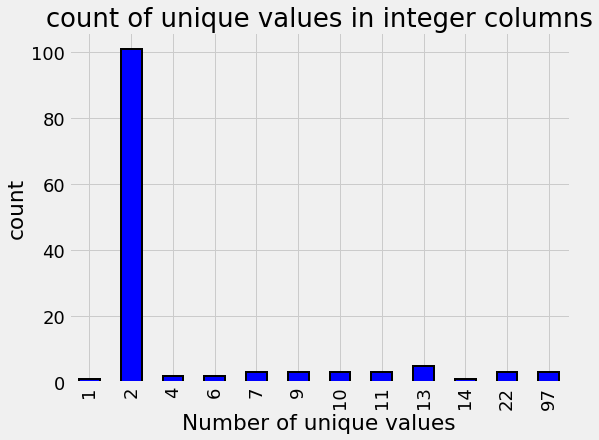

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', figsize = (8,6), edgecolor = 'k', linewidth = 2);

plt.xlabel('Number of unique values')
plt.ylabel('count')
plt.title('count of unique values in integer columns')

In [6]:
train.loc[train['Target'] == 2, 'v18q1']

50     NaN
51     NaN
52     NaN
53     NaN
58     NaN
        ..
9552   NaN
9553   NaN
9554   NaN
9555   NaN
9556   NaN
Name: v18q1, Length: 1597, dtype: float64

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

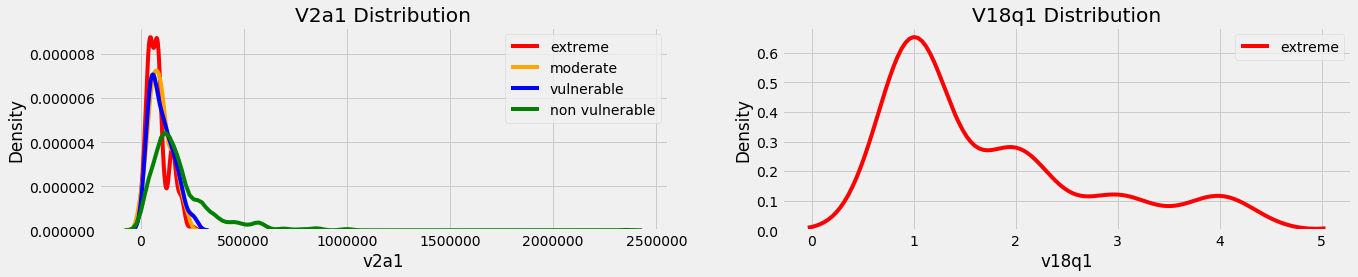

In [7]:
from collections import OrderedDict # OrderedDict 함수는 넣은 값 순서대로 반환하는 함수이다. (현재는 dict 함수도 순서를 보장해주기 때문에 잘 사용하지 않는다.)

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1:'red', 2 : 'orange', 3 : 'blue', 4 : 'green'}) 
poverty_mapping = OrderedDict({1 : 'extreme', 2 : 'moderate', 3 : 'vulnerable', 4 : 'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')): # enumerate는 이게 몇 번째 반복인지까지 명시해주는 반복문이다.
    ax = plt.subplot(4,2,i+1)  # subplot(nrow,ncol,pos)라고 생각하자. 여기서는 4행 2열, i+1에 넣자! 함수이다.
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),ax = ax, color = color, label = poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')
    
plt.subplots_adjust(top = 2)    

In [8]:
train.select_dtypes('object').head()  #select_dtypes는 원하는 타입의 데이터들만 뽑아서 반환해주는 함수이다. 매우 유용한 듯

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [9]:
mapping = {'yes' : 1, "no" : 0}

for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64) # 컬럼의 값들을 mapping에 나와있는대로 replacing하고 float 형으로 변환한다. 
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    
train[['dependency','edjefa','edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


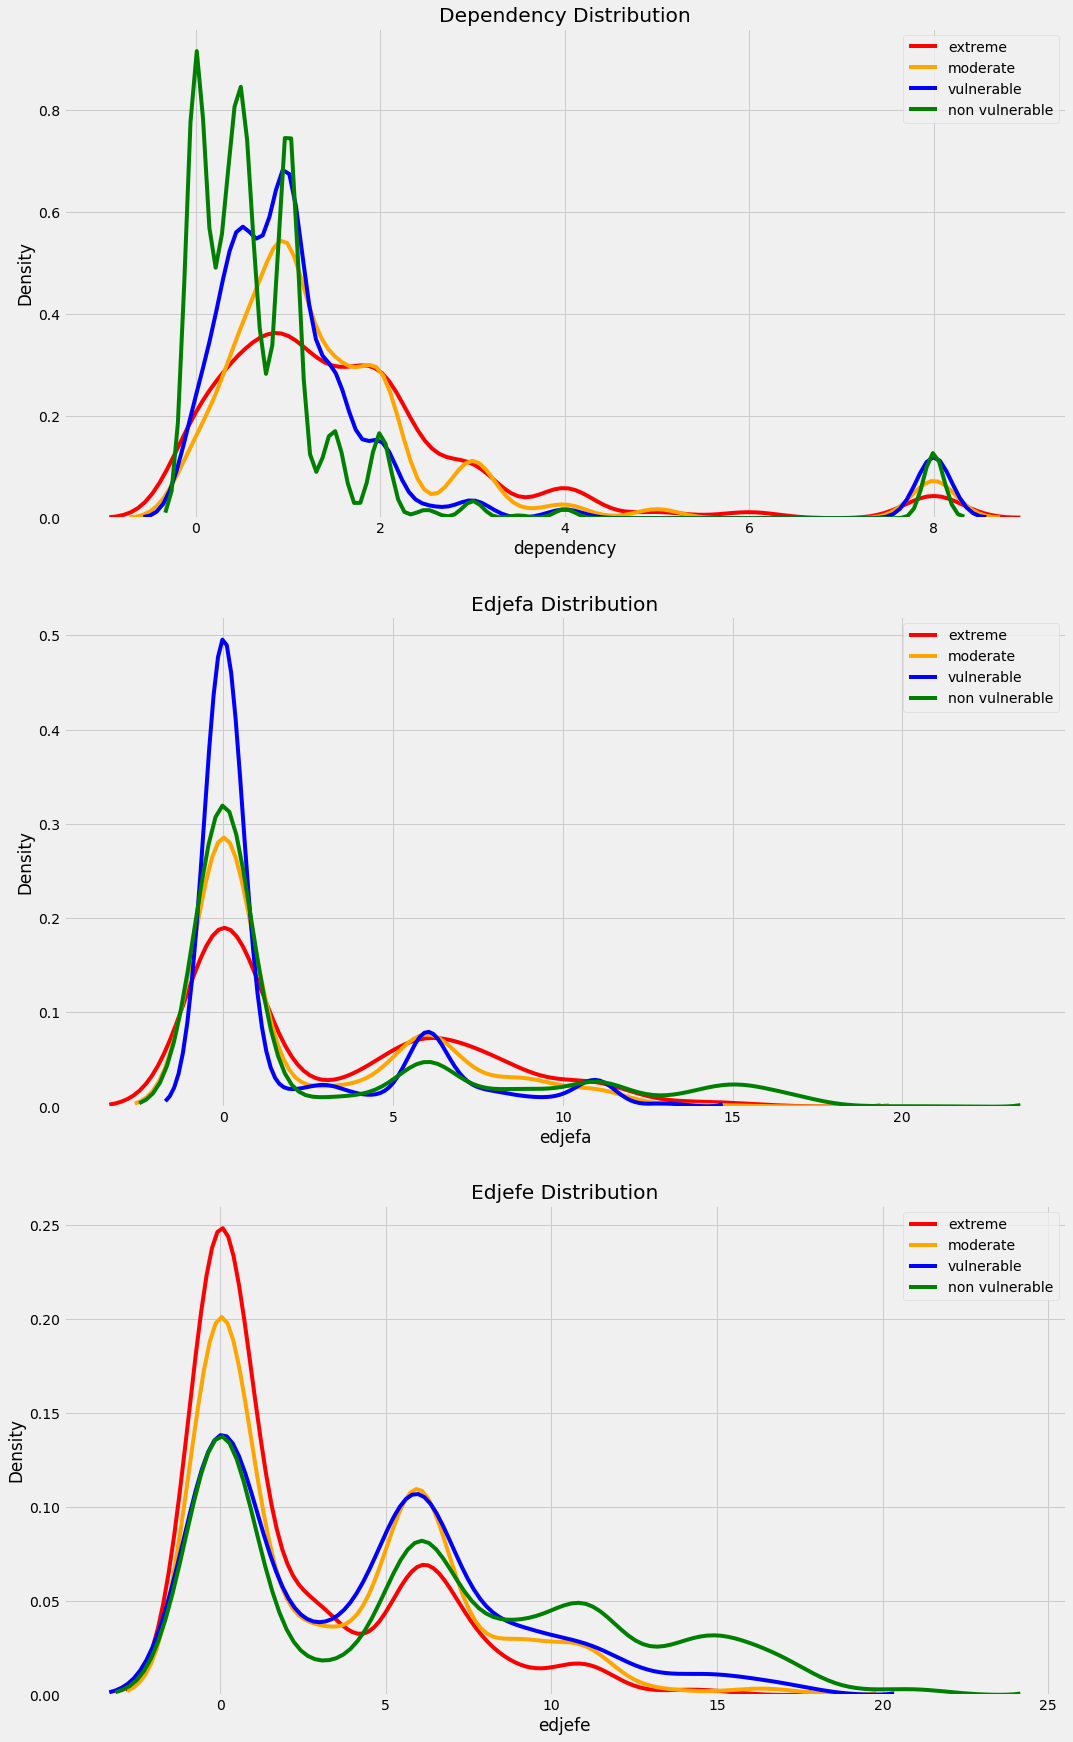

In [10]:
plt.figure(figsize = (16,12))

for i, col in enumerate(['dependency','edjefa','edjefe']):
    ax = plt.subplot(3,1,i+1)
    
    for poverty_level, color in colors.items():  # key, value 쌍으로 반환하는 것
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
        
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')
        
plt.subplots_adjust(top = 2)

In [11]:
test['Target'] = np.nan  # test dataset에 Target을 null값으로 추가해 train과 test data를 한꺼번에 엔지니어링한다!

data = train.append(test,ignore_index = True)

In [12]:
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.00,100.0000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.00,144.0000,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.00,121.0000,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.00,121.0000,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.00,121.0000,1369,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c5

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

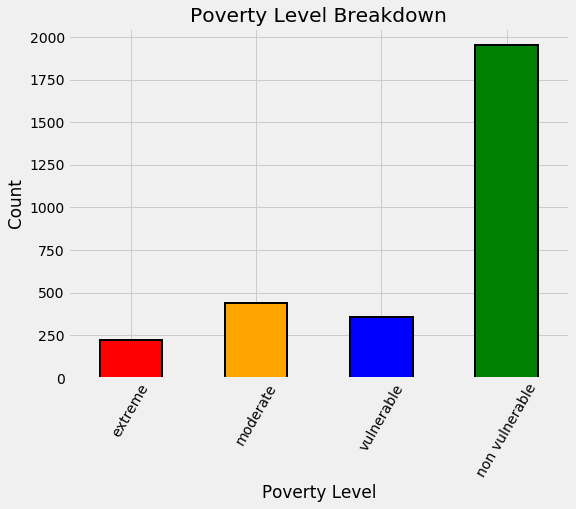

In [13]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()  # 인덱스를 기준으로 정렬하여 표시
#위의 코드는 집의 가장들의 poverty level이다. (test set은 target 값이 없으므로 제외했다.)

label_counts.plot.bar(figsize = (8,6),color = colors.values(),edgecolor = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()], list(poverty_mapping.values()),rotation = 60)
plt.title('Poverty Level Breakdown')

label_counts


# 매우 다양한 score metric가 있는데 그 중에서 macro를 사용한 이유가 바로 target 4가 비정상적으로 많아서이다.
# 오버 샘플링이든, 다운 샘플링이든 머신러닝의 정확성을 높이기 위해서는 다음 과정이 필요하다.

In [14]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique() == 1) 

not_equal = all_equal[all_equal != True]  # idhogar의 값이 1개가 아니라면 이는 가구의 대표자와 구성원의 target값이 다름을 의미한다.
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [15]:
train[train['idhogar'] == not_equal.index[0]][['idhogar','parentesco1','Target']] # 대표자의 target은 3, 근데 target이 2인 사람도 존재한다.

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [16]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

In [17]:
households_leader

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [18]:
train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]  # 리더가 0명인 사람들의 정보를 뽑자

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4935,ID_717302050,NaN,0,8,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,6,NaN,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,09b195e7a,2,2,0,4,1.000000,6.0,0.0,6.000000,0,0,1,0,0,0,0,0,0,5,0.800000,1,0,0,0,0,0,1,1,4,1,0,0,0,0,0,0,1,34,36,1156,16,36,4,0.640000,1.000000,36.000000,1156,3
4975,ID_ff6f13458,NaN,0,4,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,9,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,896fe6d3e,2,2,0,4,1.000000,9.0,0.0,7.500000,0,0,0,0,0,1,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,16,81,256,16,81,4,4.000000,1.000000,56.250000,256,3
5391,ID_64c9eabac,NaN,0,5,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3,14,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,61c10e099,0,3,0,3,0.000000,6.0,0.0,8.666667,0,0,0,0,0,0,0,1,0,3,1.000000,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,20,196,400,9,36,0,1.000000,0.000000,75.111115,400,3
5396,ID_8948b1f91,90000.0,0,5,0,1,1,0,NaN,2,1,3,1,1,2,3,2,5,5,5,3,0.0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,374ca5a19,3,2,0,5,1.500000,6.0,0.0,8.500000,0,1,0,0,0,0,0,0,0,3,1.666667,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,1,10,9,100,25,36,9,2.777778,2.250000,72.250000,100,3
6443,ID_8ddb34d2c,NaN,0,3,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,bfd5067c2,2,2,0,4,1.000000,3.0,0.0,6.000000,1,0,0,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,7,0,49,16,9,4,4.000000,1.000000,36.000000,49,3
6444,ID_03e2f23b0,NaN,0,3,0,1,1,0,NaN,1,1,2,0,2,2,1,3,4,4,4,6,0.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,bfd5067c2,2,2,0,4,1.000000,3.0,0.0,6.000000,0,0,1,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,13,36,169,16,9,4,4.000000,1.000000,36.000000,169,3
7086,ID_ba2ac56bb,NaN,0,4,0,1,1,0,NaN,0,1,1,2,2,4,2,3,5,5,5,11,NaN,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1367ab31d,3,2,0,5,1.500000,16.0,0.0,18.000000,0,0,0,0,1,0,0,0,0,2,2.500000,1,0,0,0,0,0,0,1,3,0,0,1,0,0,0,0,1,19,121,361,25,256,9,6.250000,2.250000,324.000000,361,3
7438,ID_7ba374a80,NaN

In [19]:
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [20]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


In [21]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [22]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0 : 'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [23]:
def plot_value_counts(df, col, heads_only = False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue', edgecolor = 'k',linewidth = 2)
    
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

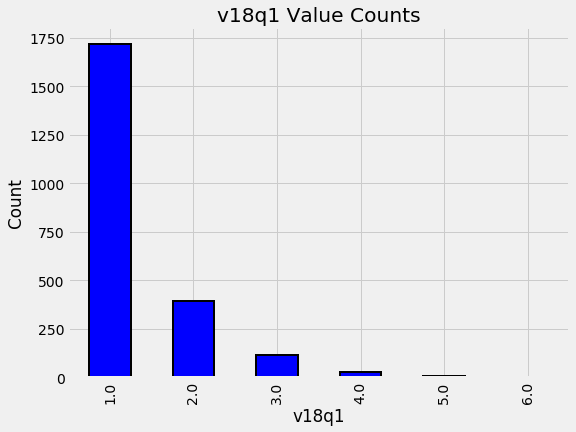

In [24]:
plot_value_counts(heads, 'v18q1')

In [25]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

태블릿을 소유하고 있는 사람들 중에는 결측치가 존재하지 않는다. 소유하고 있지 않은 사람들은 결측치 존재

--> 태블릿을 소유하고 있지 않은 사람들만 결측 값을 갖는다. 결측 값을 0으로 채워도 좋다!

In [26]:
own_variables = [x for x in data if x.startswith('tipo')]  # tipo로 시작하는 columns들을 own_variable에 저장

In [27]:
own_variables

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

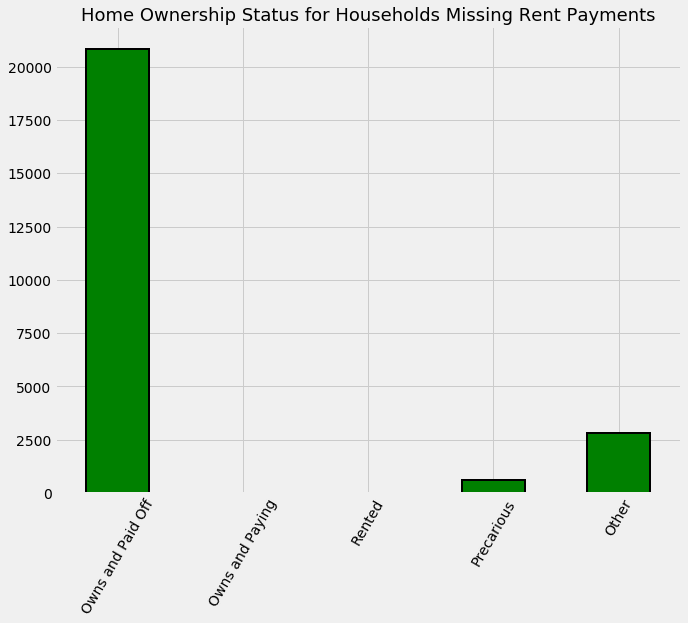

In [28]:
data.loc[data['v2a1'].isnull(),own_variables].sum().plot.bar(figsize = (10,8), color = 'green', edgecolor = 'k', linewidth = 2)

plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

v2a1에 대한 결측 값이 1에 몰렸다는 것은, 1은 온전히 집을 소유하고 있는 사람들이기 때문에 결측값을 0으로 채워도 무방함을 의미한다.

In [29]:
# tipovivi1인 사람들은 v2a1을 0으로 결측치를 채웠고, 나머지는 v2a1-missing 컬럼에 임의로 표시하였다.

data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

In [30]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [31]:
data['rez_esc'].notnull()

0        False
1        False
2        False
3         True
4        False
         ...  
33408     True
33409    False
33410     True
33411     True
33412    False
Name: rez_esc, Length: 33413, dtype: bool

In [32]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [33]:
data.loc[(data['age'] > 19) | (data['age'] < 7) & (data['rez_esc'].isnull()), 'rez_esc'] = 0  # 나이가 7세 이하, 19세 이상이면서 rez_esc가 결측인 사람들을 0으로 메꿔주었다.

In [34]:
data['rez_esc-missing'] = data['rez_esc'].isnull()

In [35]:
data[data['rez_esc-missing'] == True]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,v2a1-missing,rez_esc-missing
11,ID_de822510c,100000.0,0,3,0,1,1,0,NaN,0,0,0,0,2,2,0,2,2,2,2,12,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,bb2094100,1,1,0,2,1.000000,0.0,11.0,23.000000,0,0,0,0,0,0,1,0,0,2,1.000000,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,144,324,4,0,1,1.000000,1.000000,529.000000,324,4.0,False,True
15,ID_0a39e419e,90000.0,1,2,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,11,NaN,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6893e65ca,2,2,1,4,3.000000,0.0,10.0,17.000000,0,0,0,0,1,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,19,121,361,16,0,4,16.000000,9.000000,289.000000,361,4.0,False,True
17,ID_336c51386,90000.0,1,2,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,11,NaN,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,6893e65ca,2,2,1,4,3.000000,0.0,10.0,17.000000,0,0,0,0,1,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,19,121,361,16,0,4,16.000000,9.000000,289.000000,361,4.0,False,True
35,ID_beb36ce09,0.0,0,5,0,1,1,0,NaN,0,4,4,0,1,1,0,5,5,5,5,0,NaN,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,cb6bb28dd,1,4,0,5,0.250000,11.0,0.0,5.250000,1,0,0,0,0,0,0,0,0,3,1.666667,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,1,0,19,0,361,25,121,1,2.777778,0.062500,27.562500,361,4.0,False,True
111,ID_642ae6a8d,200000.0,0,5,0,1,1,0,NaN,1,2,3,0,3,3,1,5,6,6,6,7,NaN,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,c179fa326,2,4,1,6,1.000000,14.0,0.0,11.500000,0,0,0,1,0,0,0,0,0,3,2.000000,0,0,1,0,0,0,1,1,4,1,0,0,0,0,0,1,0,18,49,324,36,196,4,4.000000,1.000000,132.250000,324,4.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33310,ID_9be66d3a6,55000.0,0,4,0,1,1,0,NaN,0,1,1,1,4,5,1,5,6,6,6

In [36]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

In [37]:
def plot_categoricals(x,y,data,annotate = True):
    
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))  # y에 대해서 x의 개수를 나타낸 함수이다. 이때 noramlize는 false로 비율이 아닌 실제 수를 계산한다.
    raw_counts = raw_counts.rename(columns = {x : 'raw_count'})
    
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    counts = counts.rename(columns = {x:'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14,10))
    
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen', s = 100*np.sqrt(counts['raw_count']),marker = 'o', alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        for i ,row in counts.iterrows(): # count의 한 행에 대한 인덱스와 그 행의 값을 반환하는 것이다. 
            plt.annotate(xy = (row[x] - (1/counts[x].nunique()), row[y] - (0.15 / counts[y].nunique())), color = 'navy',s= f"{round(row['percent'], 1)}%")
        
        
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    msizes = list(range(sqr_min, sqr_max, int((sqr_max - sqr_min) / 5)))
                  
    markers = []
                  
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
                  
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

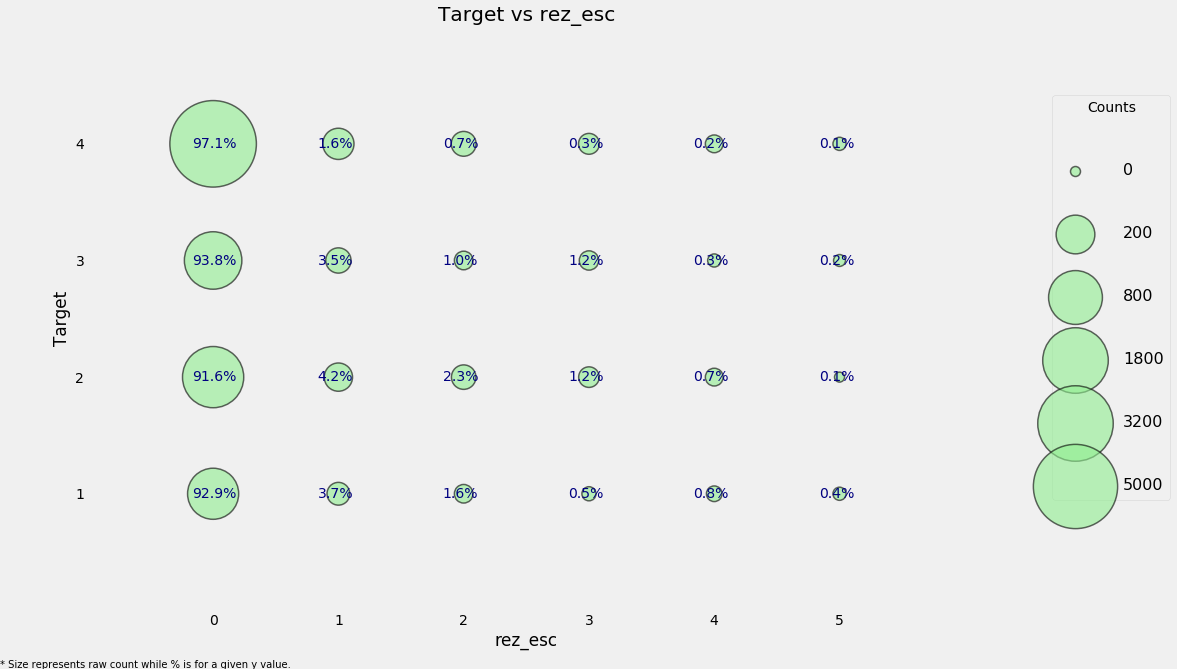

In [38]:
plot_categoricals('rez_esc','Target',data)

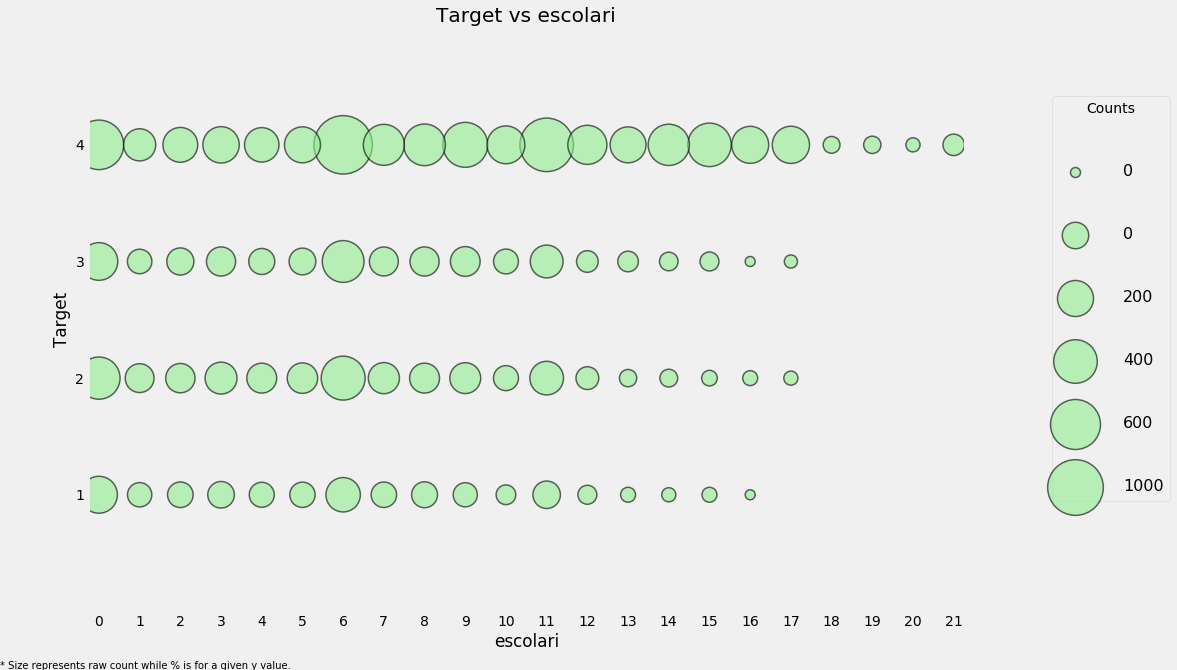

In [39]:
plot_categoricals('escolari','Target',data,annotate = False)

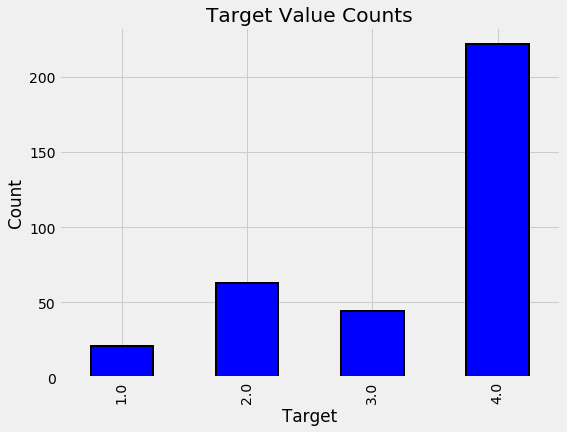

In [40]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)],'Target')

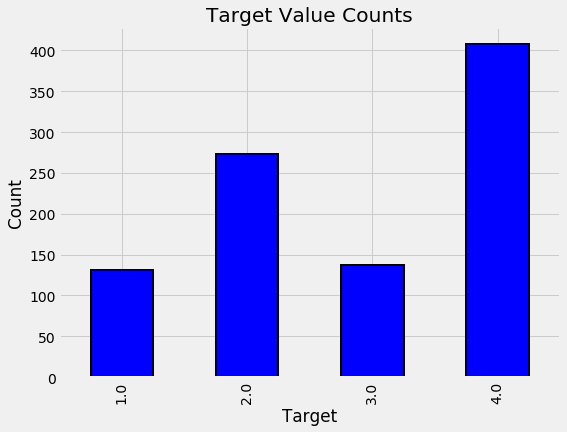

In [41]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

In [42]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [43]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats :', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable:', len(x) == data.shape[1])

There are no repeats : True
We covered every variable: True


Text(0.5, 1, 'Squared Age versus Age')

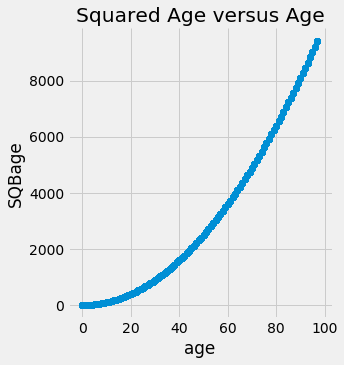

In [44]:
sns.lmplot('age','SQBage',data = data, fit_reg = False)  # x,y관계를 플롯해주고, 직선까지 제시해주는 함수
plt.title('Squared Age versus Age')

In [45]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

In [46]:
heads = data.loc[data['parentesco1'] == 1, :] 

In [47]:
heads

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target,v2a1-missing,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4.0,False,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4.0,False,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4.0,False,False
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4.0,False,False
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,1.0,9.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,4.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,ID_265b917e8,0.0,0,4,0,0,0,0,NaN,1,0,1,0,1,1,1,1,2,2,2,3,0.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,e44cb9969,1,1,1,2,8.0,0.0,3.0,3.00,0,1,0,0,0,0,0,0,0,2,1.000000,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,68,NaN,False,False
33398,ID_19c0b1480,NaN,0,4,0,1,1,0,NaN,1,1,2,1,3,4,2,4,6,6,6,4,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,

In [48]:
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]

In [49]:
heads

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,190000.0,0.0,10.0,0.0,10.00,1.000000,3,0,1,1,0,0,0,0,1,1,NaN,1,1,1,0,1,0,1,1,1
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,135000.0,8.0,12.0,0.0,12.00,1.000000,4,0,1,1,0,0,0,0,1,1,1.0,1,1,1,0,1,1,1,1,1
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False,0.0,8.0,0.0,11.0,11.00,0.500000,8,0,0,0,0,1,1,0,1,1,NaN,1,1,1,0,1,1,1,2,0
5,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,180000.0,1.0,11.0,0.0,11.00,1.333333,5,0,2,2,1,1,2,1,3,4,1.0,4,4,4,2,2,0,4,3,3
8,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,130000.0,1.0,9.0,0.0,10.00,4.000000,2,0,1,1,2,1,3,2,2,4,NaN,4,4,4,2,2,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,ID_265b917e8,e44cb9969,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,False,0.0,8.0,0.0,3.0,3.00,1.000000,4,1,0,1,0,1,1,1,1,2,NaN,2,2,2,1,1,1,2,2,2
33398,ID_19c0b1480,935a65ffa,NaN,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,True,NaN,2.0,4.0,0.0,5.00,3.000000,4,1,1,2,1,3,4,2,4,6,NaN,6,6,6,4,2,0,6,2,2
33400,ID_aa256c594,2edb6f51e,NaN,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,False,0.0,0.5,0.0,0.0,5.50,1.000000,5,0,1,1,0,2,2,0,3,3,NaN,3,3,3,1,2,0,3,3,3
33404,ID_4b7feead3,3aa78c56b,NaN,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,False,0.0,0.5,5.0,0.0,5.75,6.000000,2,0,2,2,1,3,4,1,5,6,NaN,6,6,6,2,4,0,6,1,1


In [50]:
heads.shape

(10307, 99)

In [51]:
corr_matrix = heads.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))

In [52]:
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [53]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


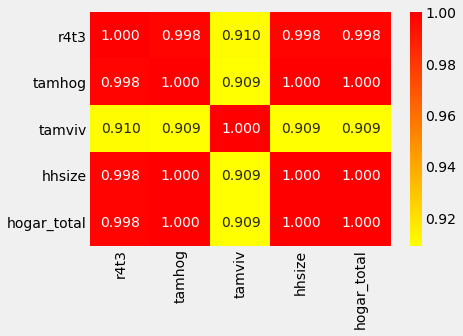

In [54]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9], annot = True, cmap = plt.cm.autumn_r, fmt = '.3f')

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'House size vs number of persons living in the household')

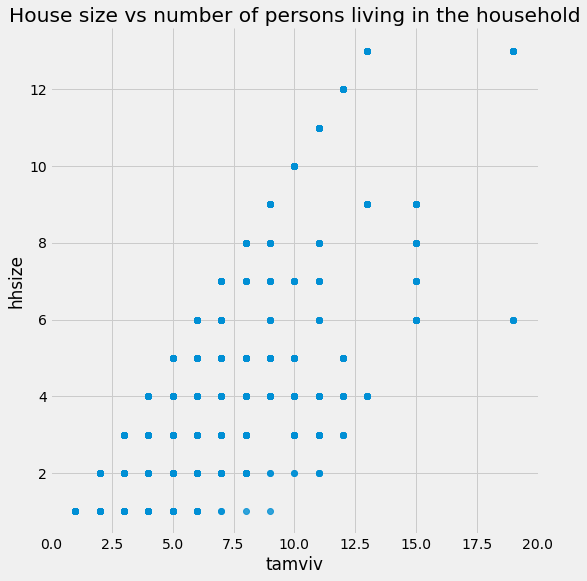

In [55]:
sns.lmplot('tamviv','hhsize',data,fit_reg = False, size = 8)
plt.title('House size vs number of persons living in the household')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


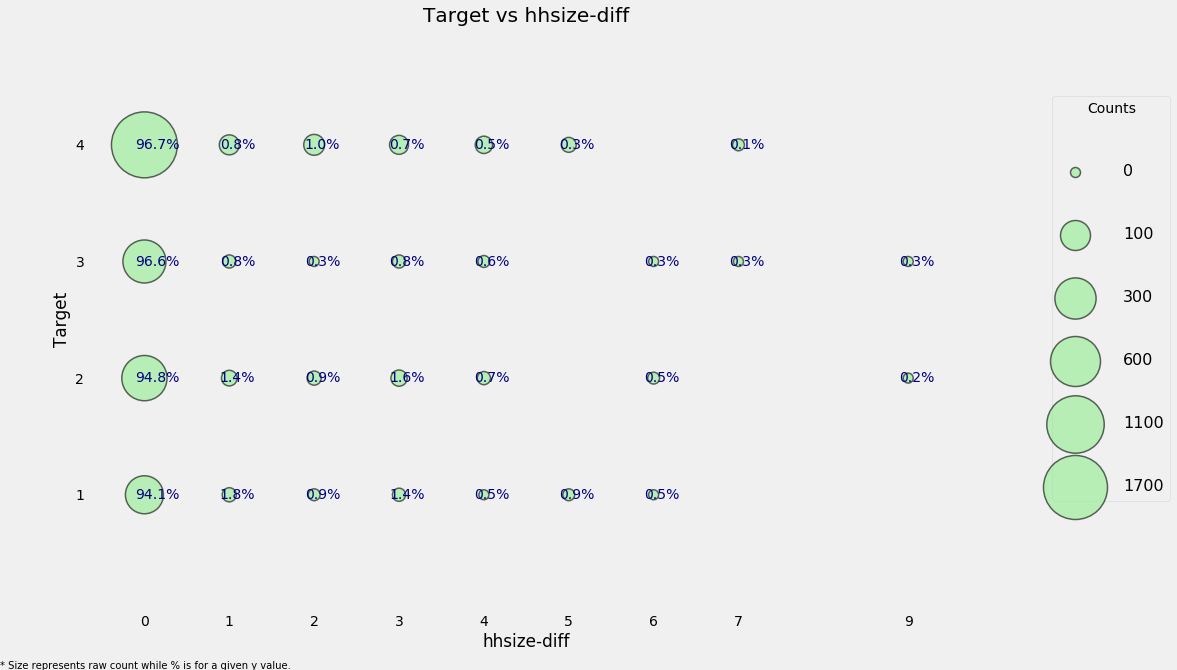

In [56]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff','Target',heads)

In [57]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]


,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [58]:
elec = []

for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [59]:
heads[['elec-missing','elec']]

,elec-missing,elec
0,False,2.0
1,False,2.0
2,False,2.0
5,False,2.0
8,False,2.0
...,...,...
33393,True,NaN
33398,False,1.0
33400,False,1.0
33404,False,1.0


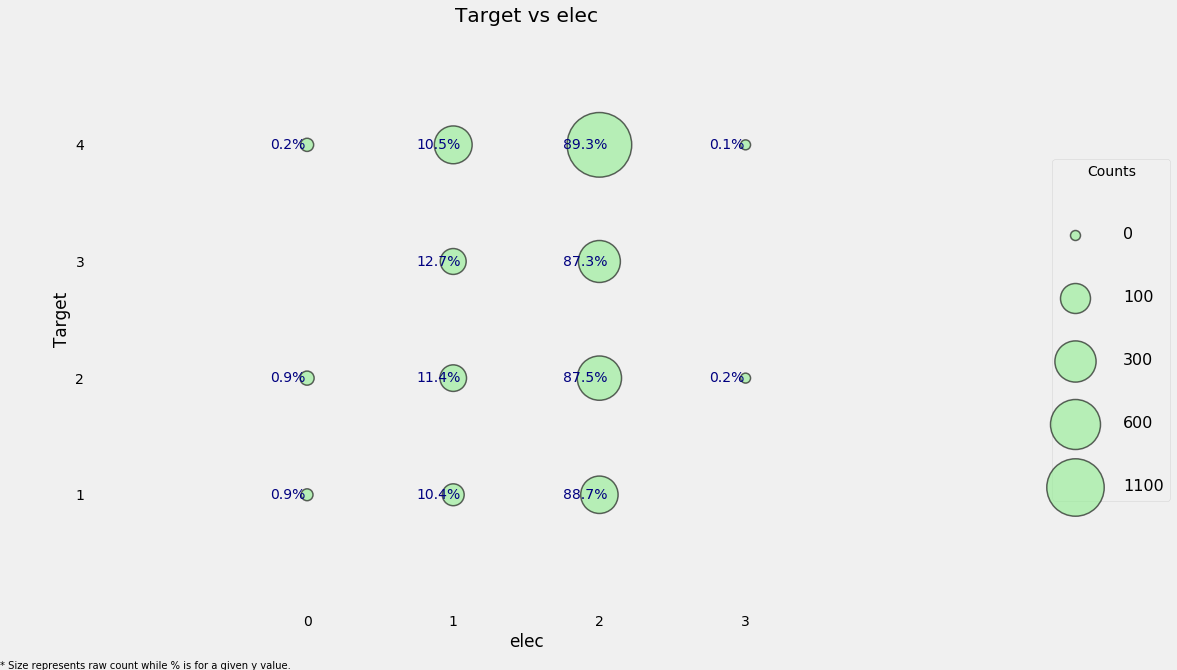

In [60]:
plot_categoricals('elec','Target',heads)

In [61]:
heads = heads.drop(columns = ['noelec','coopele','public','planpri'])

In [62]:
heads = heads.drop(columns = 'area2')

In [63]:
heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

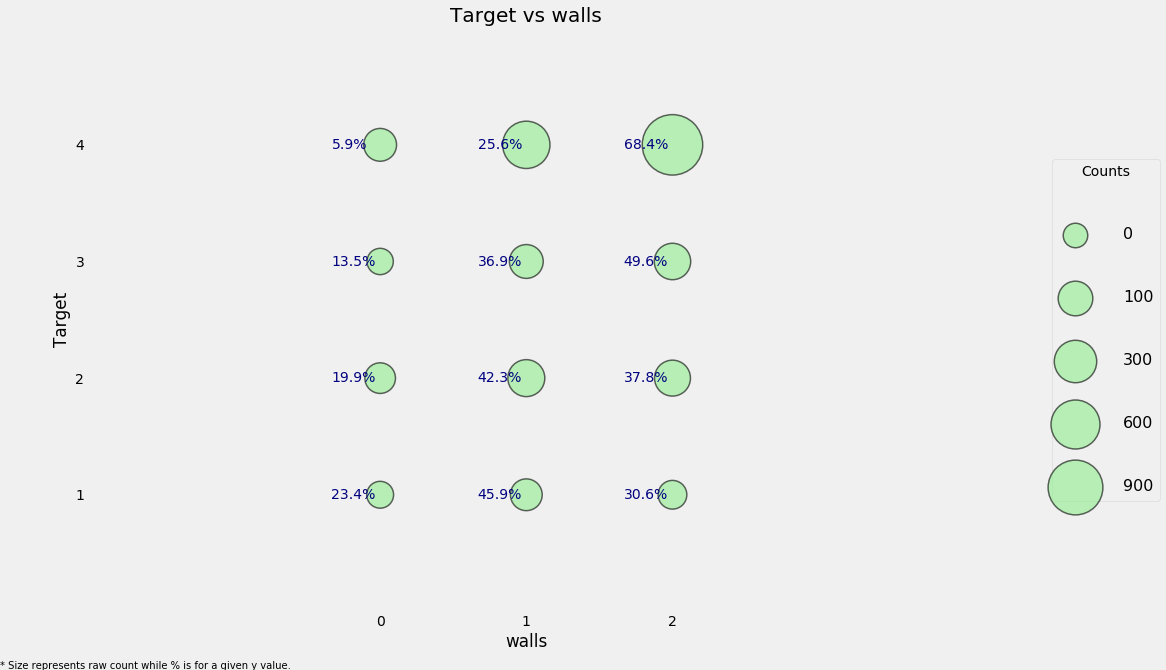

In [64]:
heads['walls'] = np.argmax(np.array(heads[['epared1','epared2','epared3']]),axis = 1)

plot_categoricals('walls','Target',heads)

In [65]:
heads['roof'] = np.argmax(np.array(heads[['etecho1','etecho2','etecho3']]),axis = 1)

heads = heads.drop(columns = ['etecho1','etecho2','etecho3'])

heads['floor'] = np.argmax(np.array(heads[['eviv1','eviv2','eviv3']]), axis = 1)

heads = heads.drop(columns = ['eviv1','eviv2','eviv3'])

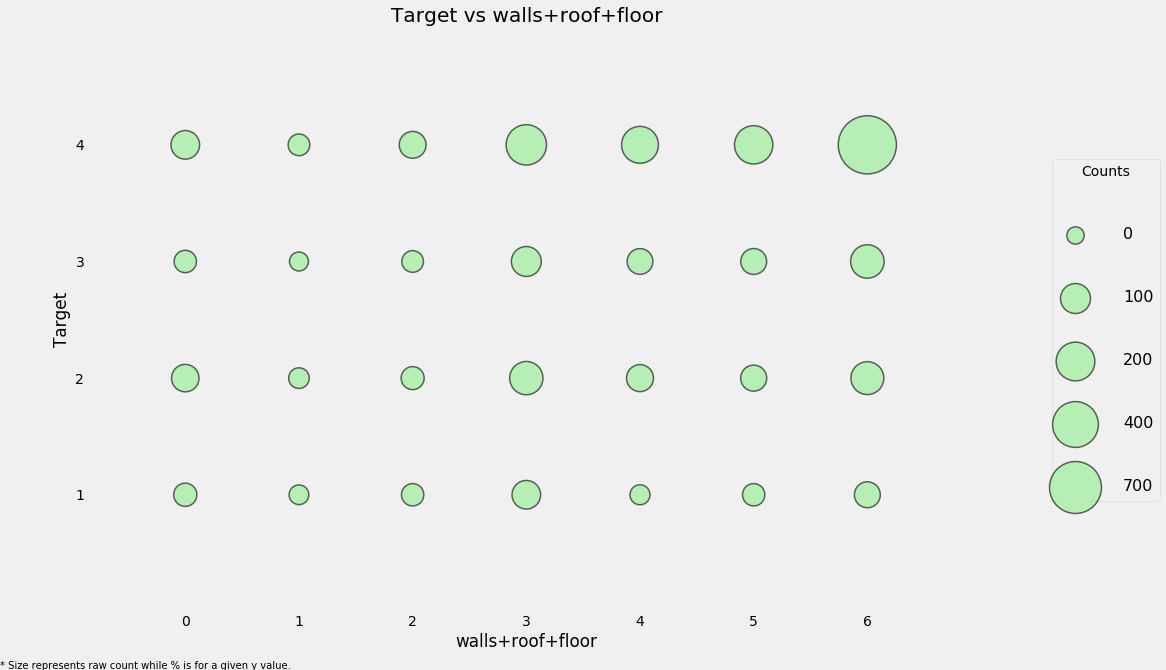

In [66]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor','Target',heads,annotate = False)

In [67]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target' : 'Normalized Count'}).reset_index()

In [68]:
counts

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529
5,1,2.0,0.264706
6,1,1.0,0.220588
7,1,3.0,0.191176
8,2,4.0,0.409449
9,2,2.0,0.220472


In [69]:
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))

Text(0.5, 1.0, 'Target vs Warning Variable')

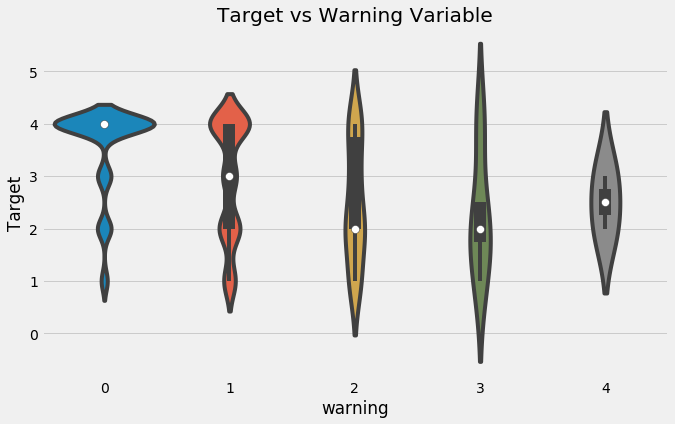

In [70]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'warning', y = 'Target', data = heads)
plt.title('Target vs Warning Variable')

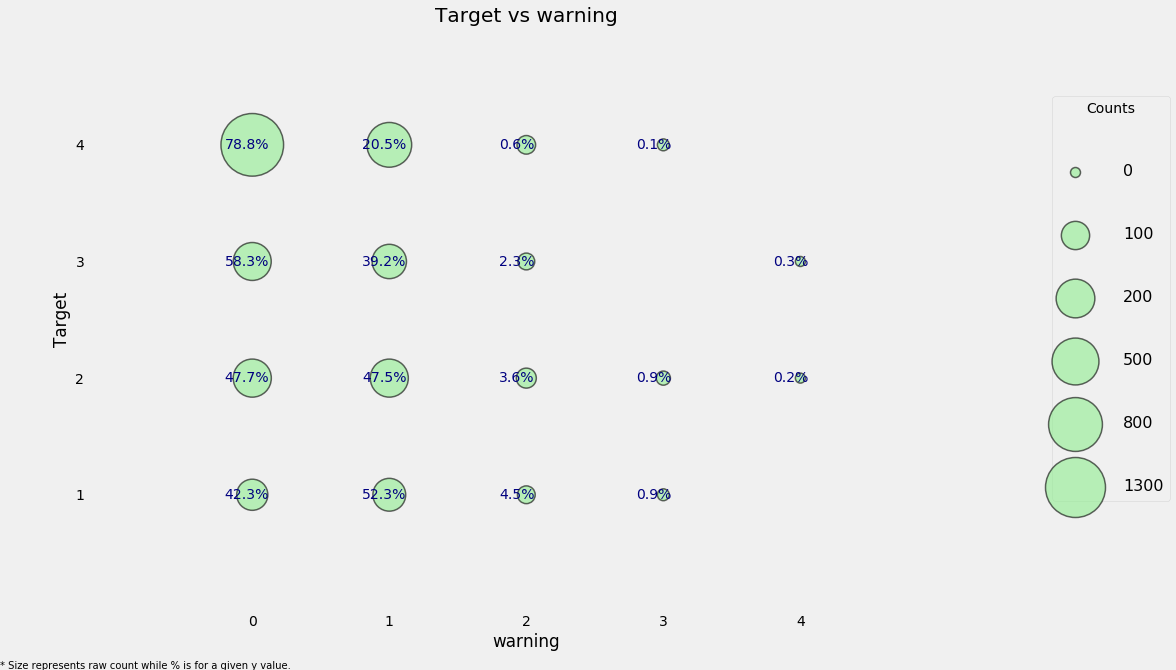

In [71]:
plot_categoricals('warning','Target',data = heads)

Text(0.5, 1.0, 'Target vs Bonus Variable')

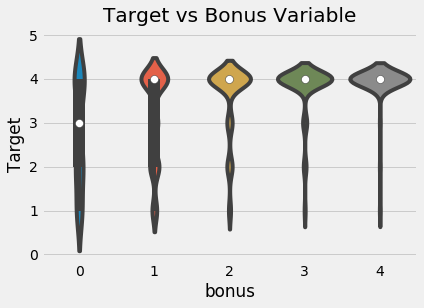

In [72]:
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1'] > 0) + heads['television'])

sns.violinplot('bonus','Target',data = heads, figsize = (10,6))
plt.title('Target vs Bonus Variable')

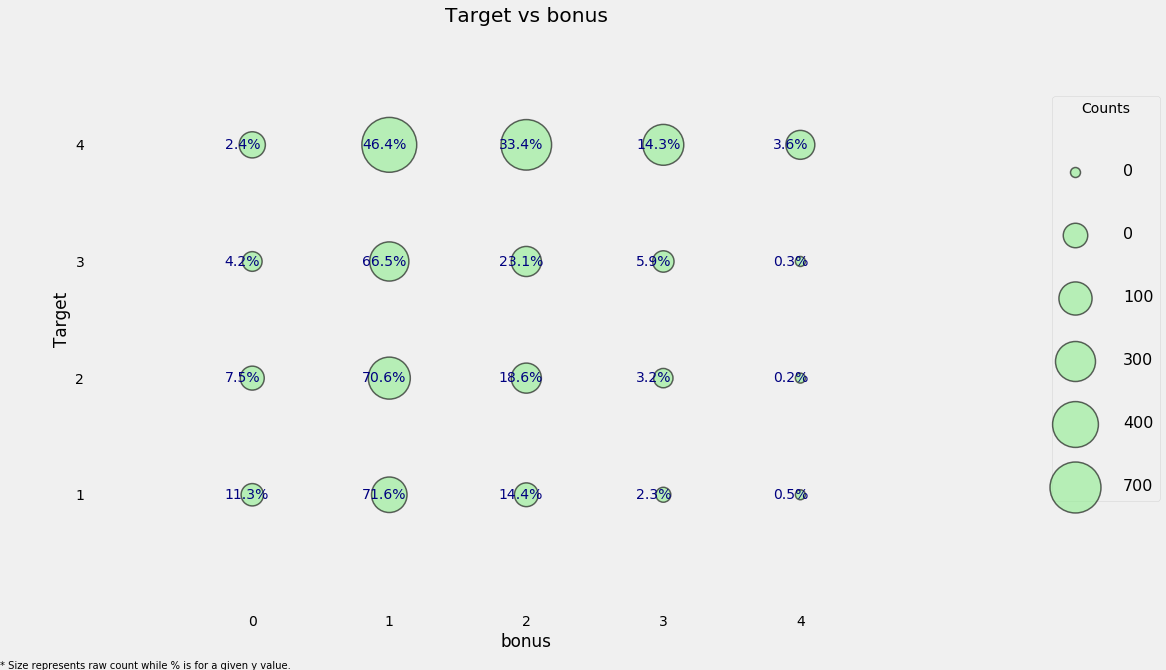

In [73]:
plot_categoricals('bonus','Target',heads)

In [74]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rents-per-capita'] = heads['v2a1'] / heads['tamviv']

In [75]:
heads[['rents-per-capita','v2a1','tamviv']]

,rents-per-capita,v2a1,tamviv
0,190000.0,190000.0,1
1,135000.0,135000.0,1
2,0.0,0.0,1
5,45000.0,180000.0,4
8,32500.0,130000.0,4
...,...,...,...
33393,0.0,0.0,2
33398,NaN,NaN,6
33400,0.0,0.0,3
33404,0.0,0.0,6


pearson correlation : 선형 상관계수 측정 (두 값 증가나 감소의 변화도 고려한 상관계수이다.)

spearman correlation : 모노토닉 상관계수 측정 (단조 상관계수?) 이는 변화한 값에 직접적인 연관을 갖는 것이 아닌, 단순히 상태에 영향을 받는다. (순위를 매겨서 측정하기 때문에 순위만 같다고 차이의 크기는 중요하지 않다.) 흔히 순서형 변수들의 상관관계를 나타낼 때 많이 사용된다.

In [76]:
from scipy.stats import spearmanr

In [77]:
def plot_corrs(x,y):
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0,1]
    
    data = pd.DataFrame({'x' : x, 'y' : y})
    plt.figure(figsize = (6,4))
    sns.regplot('x','y',data = data, fit_reg = False)
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

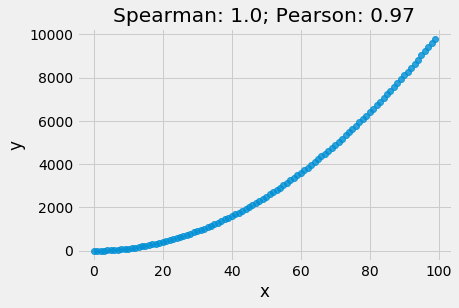

In [78]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x,y)

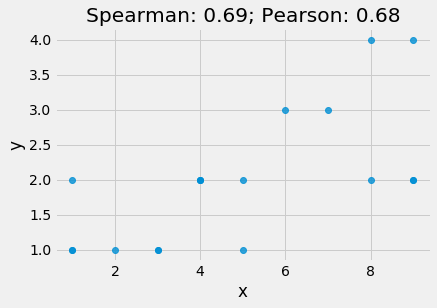

In [79]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

In [80]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

In [81]:
pcorrs= pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target' : 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index' : 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479

Most positively correlated variables:
              feature     pcorr
93  phones-per-capita  0.299026
94              floor  0.307605
95   walls+roof+floor  0.332446
96           meaneduc  0.333652
97             Target  1.000000


항상 기억해야하는 것은 상관관계를 통해 인과관계를 해석할 수는 없다는 것이다. 

상관계수 (일반적, 매번 바뀜)

- 매우 약함 : 0 ~ 0.19

- 약함 : 0.2 ~ 0.39

- 적당함 : 0.4 ~ 0.59

- 강함 : 0.6 ~ 0.79

- 매우 강함 : 0.8 ~ 1.0

p-value : 귀무가설이 참이라고 생각할 때, 해당 귀무가설을 뒷받침해줄 데이터가 관측될 확률이다.

p-value가 낮으면 우리가 예측한 귀무가설을 기각하고 대립가설을 채택해야한다.

p-vlaue가 0.05보다 낮은 경우 우리는 이를 중요하다고 판단한다. (대립가설 채택 유력)

In [82]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)  # 그냥 경고 메세지 숨기는 것

feats = []
scorr = []
pvalues = []

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c)
        
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c],train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature' : feats, 'scorr' : scorr, 'pvalue' : pvalues}).sort_values('scorr')

In [83]:
scorrs

,feature,scorr,pvalue
93,warning,-0.307326,4.682829e-66
61,dependency,-0.281516,2.792620e-55
80,hogar_nin,-0.236225,5.567218e-39
73,r4t1,-0.219226,1.112230e-33
8,pisocemento,-0.209387,8.270816e-31
42,epared1,-0.207474,2.880271e-30
65,overcrowding,-0.206694,4.772392e-30
70,r4m1,-0.171953,3.649343e-21
67,r4h1,-0.168485,2.265353e-20
43,epared2,-0.165561,1.025491e-19


In [84]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlation:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
        feature     scorr        pvalue
93      warning -0.307326  4.682829e-66
61   dependency -0.281516  2.792620e-55
80    hogar_nin -0.236225  5.567218e-39
73         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31

Most positive Spearman correlation:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
91              floor  0.309638  4.466091e-67
95  phones-per-capita  0.337377  4.760104e-80
92   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [85]:
corrs.sort_values('diff').dropna().tail()

NameError: name 'corrs' is not defined

In [86]:
train_heads['dependency']

0       0.000000
1       8.000000
2       8.000000
5       1.000000
8       1.000000
          ...   
9535    1.500000
9541    1.500000
9545    0.666667
9551    1.000000
9552    0.250000
Name: dependency, Length: 2973, dtype: float64

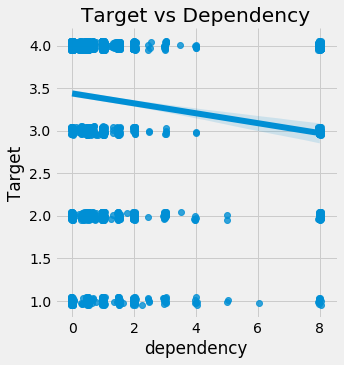

In [87]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency');

Text(0.5, 1, 'Target vs Rooms Per Capita')

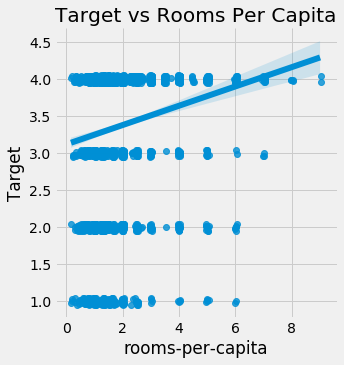

In [88]:
sns.lmplot('rooms-per-capita','Target',fit_reg = True,data = train_heads, x_jitter = 0.05,y_jitter = 0.05)
plt.title('Target vs Rooms Per Capita')

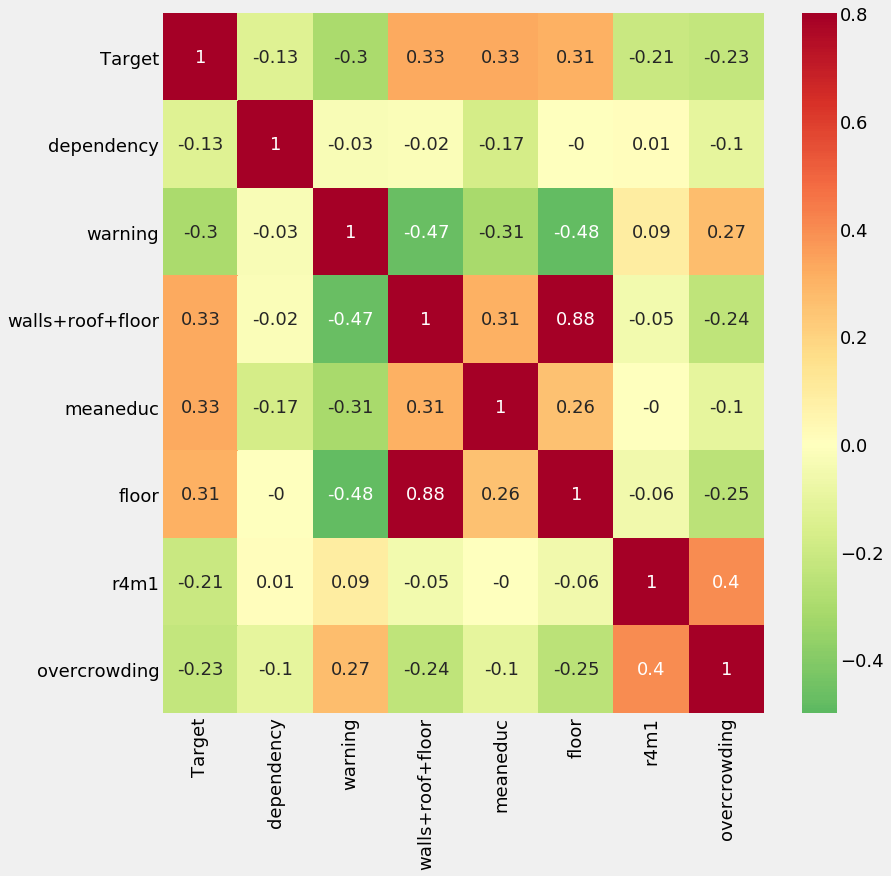

In [89]:
variables = ['Target','dependency', 'warning', 'walls+roof+floor','meaneduc','floor','r4m1','overcrowding']

corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat,vmin = -0.5,vmax = 0.8,center = 0, cmap = plt.cm.RdYlGn_r,  annot = True)

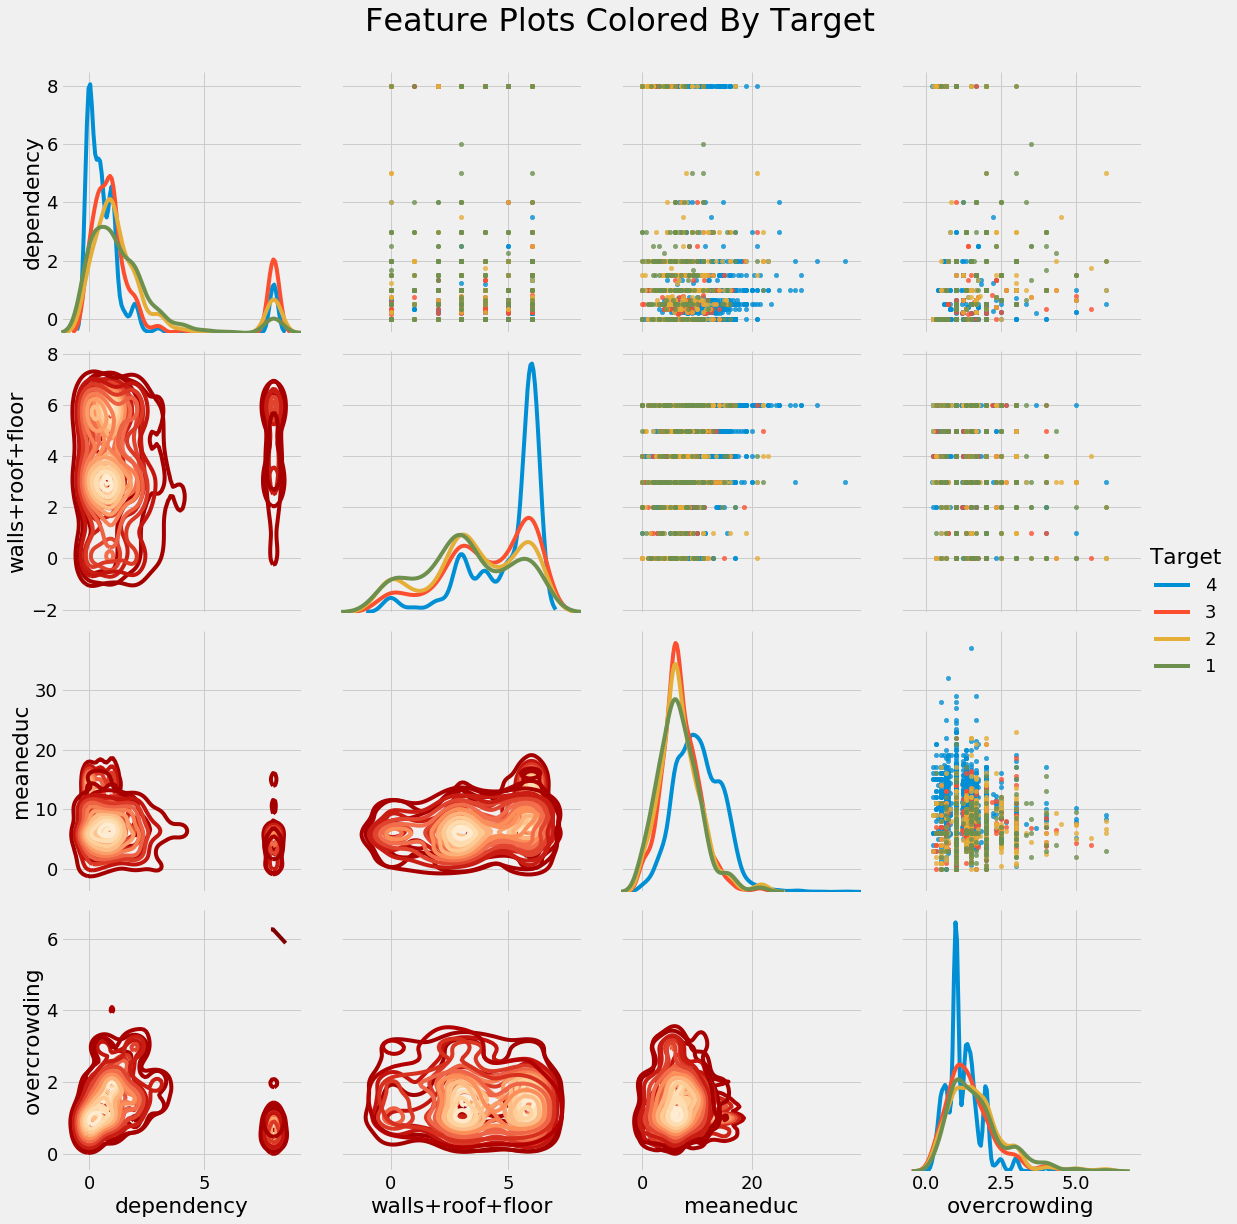

In [90]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey = False,hue = 'Target',hue_order = [4,3,2,1], vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot,cmap = plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [91]:
heads.columns

Index(['Id', 'idhogar', 'Target', 'hacdor', 'hacapo', 'v14a', 'refrig',
       'paredblolad', 'paredzocalo', 'paredpreb',
       ...
       'walls', 'roof', 'floor', 'walls+roof+floor', 'warning', 'bonus',
       'phones-per-capita', 'tablets-per-capita', 'rooms-per-capita',
       'rents-per-capita'],
      dtype='object', length=101)

In [92]:
household_feats = list(heads.columns)

In [93]:
ind = data[id_+ind_bool + ind_ordered]

In [94]:
ind.shape

(33413, 40)

In [95]:
corr_matrix = ind.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [96]:
ind = ind.drop(columns = 'male')

In [97]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [98]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

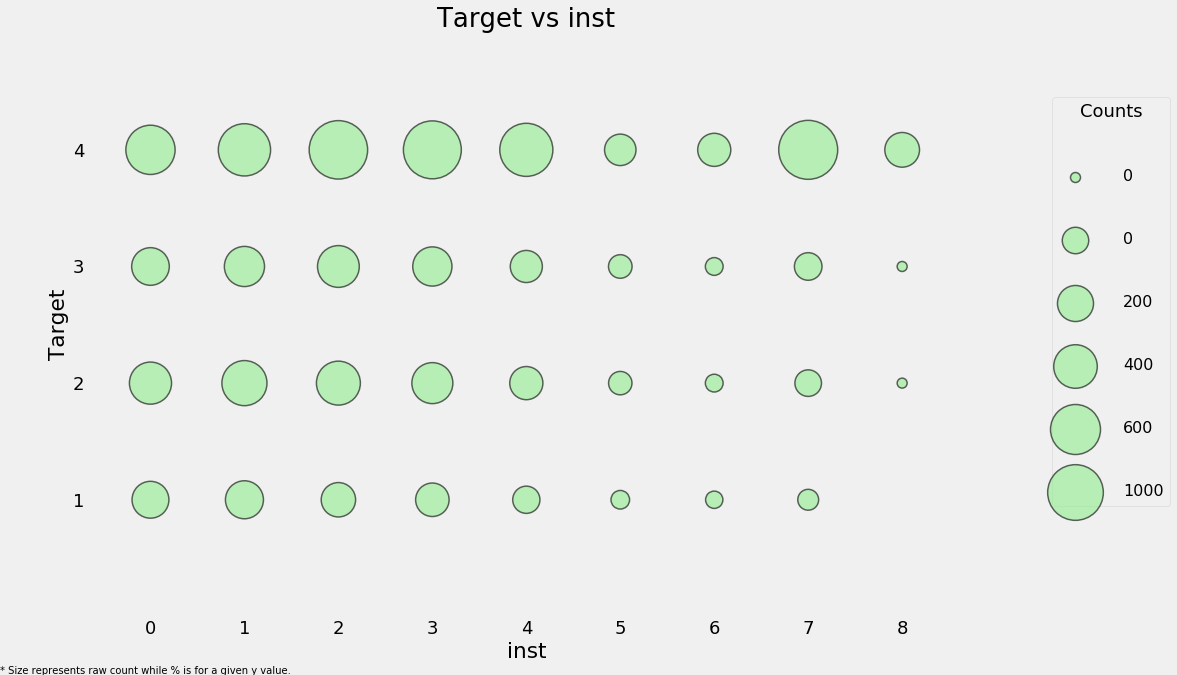

In [99]:
plot_categoricals('inst','Target',ind,annotate = False)

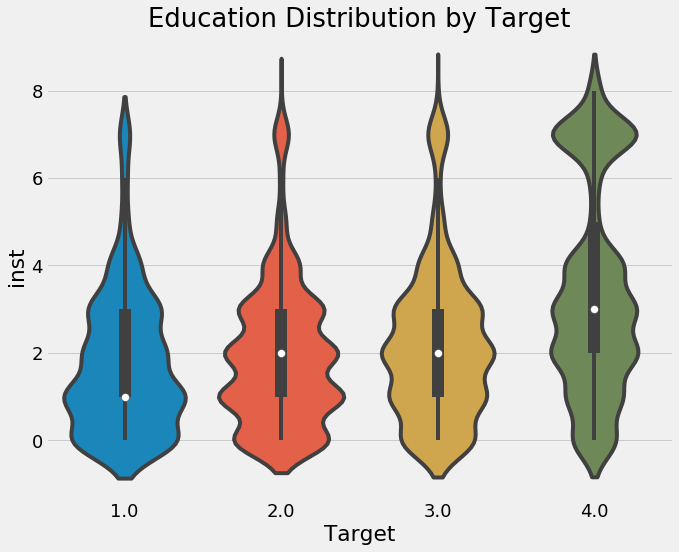

In [100]:
plt.figure(figsize = (10,8))
sns.violinplot(x = 'Target', y = 'inst',data = ind)
plt.title('Education Distribution by Target');

In [101]:
ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])

In [102]:
ind.shape

(33413, 31)

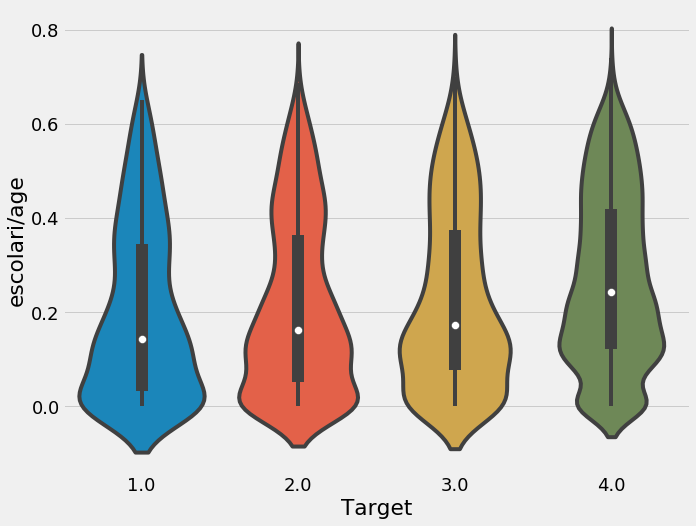

In [103]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10,8))
sns.violinplot('Target','escolari/age',data = ind)

In [104]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

In [105]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range'

In [106]:
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std',range_])

ind_agg.head()

v18q                          dis                                \
           min max sum count  std range min max sum count       std range   
idhogar                                                                     
000a08204    1   1   3     3  0.0     0   0   0   0     3  0.000000     0   
000bce7c4    0   0   0     2  0.0     0   0   1   1     2  0.707107     1   
001845fb0    0   0   0     4  0.0     0   0   0   0     4  0.000000     0   
001ff74ca    1   1   2     2  0.0     0   0   0   0     2  0.000000     0   
003123ec2    0   0   0     4  0.0     0   0   0   0     4  0.000000     0   

          female                               estadocivil1                \
             min max sum count       std range          min max sum count   
idhogar                                                                     
000a08204      0   1   1     3  0.577350     1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107     1            0   0   0     2   
001845fb0      0   1   2     4  0.577350     1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000     0            0   1   1     2   
003123ec2      0   1   1     4  0.500000     1            0   1   2     4   

                          estadocivil2                               \
                std range          min max sum count      std range   
idhogar                                                               
000a08204  0.577350     1            0   1   2     3  0.57735     1   
000bce7c4  0.000000     0            0   0   0     2  0.00000     0   
001845fb0  0.000000     0            0   1   2     4  0.57735     1   
001ff74ca  0.707107     1            0   0   0     2  0.00000     0   
003123ec2  0.577350     1            0   1   2     4  0.57735     1   

          estadocivil3                          estadocivil4                \
                   min max sum count  std range          min max sum count   
idhogar                                                                      
000a08204            0   0   0     3  0.0     0            0   0   0     3   
000bce7c4            1   1   2     2  0.0     0            0   0   0     2   
001845fb0            0   0   0     4  0.0     0            0   0   0     4   
001ff74ca            0   0   0     2  0.0     0            0   0   0     2   
003123ec2            0   0   0     4  0.0     0            0   0   0     4   

                     estadocivil5                               estadocivil6  \
           std range          min max sum count       std range          min   
idhogar                                                                        
000a08204  0.0     0            0   0   0     3  0.000000     0            0   
000bce7c4  0.0     0            0   0   0     2  0.000000     0            0   
001845fb0  0.0     0            0   0   0     4  0.000000     0            0   
001ff74ca  0.0     0            0   1   1     2  0.707107     1            0   
003123ec2  0.0     0            0   0   0     4  0.000000     0            0   

                                   estadocivil7                               \
          max sum count  std range          min max sum count      std range   
idhogar                                                                        
000a08204   0   0     3  0.0     0            0   0   0     3  0.00000     0   
000bce7c4   0   0     2  0.0     0            0   0   0     2  0.00000     0   
001845fb0   0   0     4  0.0     0            0   1   2     4  0.57735     1   
001ff74ca   0   0     2  0.0     0            0   0   0     2  0.00000     0   
003123ec2   0   0     4  0.0     0            0   0   0     4  0.00000     0   

          parentesco1                               parentesco2                \
                  min max sum count       std range         min max sum count   
idhogar                                                                         
000a08204           0   1   1     3  0.577350     1      

In [107]:
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c} - {stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q - min,v18q - max,v18q - sum,v18q - count,v18q - std,v18q - range,dis - min,dis - max,dis - sum,dis - count,dis - std,dis - range,female - min,female - max,female - sum,female - count,female - std,female - range,estadocivil1 - min,estadocivil1 - max,estadocivil1 - sum,estadocivil1 - count,estadocivil1 - std,estadocivil1 - range,estadocivil2 - min,estadocivil2 - max,estadocivil2 - sum,estadocivil2 - count,estadocivil2 - std,estadocivil2 - range,estadocivil3 - min,estadocivil3 - max,estadocivil3 - sum,estadocivil3 - count,estadocivil3 - std,estadocivil3 - range,estadocivil4 - min,estadocivil4 - max,estadocivil4 - sum,estadocivil4 - count,estadocivil4 - std,estadocivil4 - range,estadocivil5 - min,estadocivil5 - max,estadocivil5 - sum,estadocivil5 - count,estadocivil5 - std,estadocivil5 - range,estadocivil6 - min,estadocivil6 - max,estadocivil6 - sum,estadocivil6 - count,estadocivil6 - std,estadocivil6 - range,estadocivil7 - min,estadocivil7 - max,estadocivil7 - sum,estadocivil7 - count,estadocivil7 - std,estadocivil7 - range,parentesco1 - min,parentesco1 - max,parentesco1 - sum,parentesco1 - count,parentesco1 - std,parentesco1 - range,parentesco2 - min,parentesco2 - max,parentesco2 - sum,parentesco2 - count,parentesco2 - std,parentesco2 - range,parentesco3 - min,parentesco3 - max,parentesco3 - sum,...,parentesco8 - count,parentesco8 - std,parentesco8 - range,parentesco9 - min,parentesco9 - max,parentesco9 - sum,parentesco9 - count,parentesco9 - std,parentesco9 - range,parentesco10 - min,parentesco10 - max,parentesco10 - sum,parentesco10 - count,parentesco10 - std,parentesco10 - range,parentesco11 - min,parentesco11 - max,parentesco11 - sum,parentesco11 - count,parentesco11 - std,parentesco11 - range,parentesco12 - min,parentesco12 - max,parentesco12 - sum,parentesco12 - count,parentesco12 - std,parentesco12 - range,mobilephone - min,mobilephone - max,mobilephone - sum,mobilephone - count,mobilephone - std,mobilephone - range,rez_esc - min,rez_esc - max,rez_esc - sum,rez_esc - count,rez_esc - std,rez_esc - range,escolari - min,escolari - max,escolari - sum,escolari - count,escolari - std,escolari - range,age - min,age - max,age - sum,age - count,age - std,age - range,inst - min,inst - max,inst - sum,inst - count,inst - std,inst - range,escolari/age - min,escolari/age - max,escolari/age - sum,escolari/age - count,escolari/age - std,escolari/age - range,inst/age - min,inst/age - max,inst/age - sum,inst/age - count,inst/age - std,inst/age - range,tech - min,tech - max,tech - sum,tech - count,tech - std,tech - range
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.0,

In [108]:
ind_agg.iloc[:,[0, 1, 2, 3, 6, 7, 8, 9]].head()

,v18q - min,v18q - max,v18q - sum,v18q - count,dis - min,dis - max,dis - sum,dis - count
idhogar,,,,,,,,
000a08204,1,1,3,3,0,0,0,3
000bce7c4,0,0,0,2,0,1,1,2
001845fb0,0,0,0,4,0,0,0,4
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4


In [109]:
corr_matrix = ind_agg.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

In [110]:
print(f'There are {len(to_drop)} correlated columns to remove')

There are 85 correlated columns to remove


In [111]:
ind_agg = ind_agg.drop(columns = to_drop)
int_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape : ',final.shape)

Final features shape :  (10307, 196)


In [112]:
final

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,...,estadocivil3 - max,estadocivil3 - std,estadocivil4 - min,estadocivil4 - max,estadocivil5 - min,estadocivil5 - max,estadocivil5 - sum,estadocivil6 - min,estadocivil6 - max,estadocivil7 - min,estadocivil7 - max,estadocivil7 - sum,estadocivil7 - std,parentesco1 - min,parentesco1 - max,parentesco1 - std,parentesco2 - min,parentesco2 - max,parentesco2 - std,parentesco3 - min,parentesco3 - max,parentesco3 - sum,parentesco4 - min,parentesco4 - max,parentesco4 - sum,parentesco5 - min,parentesco5 - max,parentesco6 - min,parentesco6 - max,parentesco6 - sum,parentesco7 - min,parentesco7 - max,parentesco8 - min,parentesco8 - max,parentesco9 - min,parentesco9 - max,parentesco9 - sum,parentesco10 - min,parentesco10 - max,parentesco11 - min,parentesco11 - max,parentesco11 - sum,parentesco12 - min,parentesco12 - max,parentesco12 - sum,mobilephone - min,mobilephone - std,mobilephone - range,rez_esc - min,rez_esc - max,escolari - min,escolari - max,escolari - sum,escolari - std,escolari - range,age - min,age - max,age - sum,age - std,age - range,inst - max,inst - std,inst - range,escolari/age - min,escolari/age - max,escolari/age - sum,escolari/age - std,escolari/age - range,inst/age - max,inst/age - std,inst/age - range,tech - min,tech - sum,tech - std,tech - range
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.0,10.0,0.0,10.00,1.000000,3,0,1,1,0,0,0,...,0,NaN,1,1,0,0,0,0,0,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.0,12.0,0.0,12.00,1.000000,4,0,1,1,0,0,0,...,0,NaN,1,1,0,0,0,0,0,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.0,0.0,11.0,11.00,0.500000,8,0,0,0,0,1,1,...,0,NaN,0,0,0,0,0,1,1,0,0,0,NaN,1,1,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.0,11.0,0.0,11.00,1.333333,5,0,2,2,1,1,2,...,0,0.0,0,0,0,0,0,0,0,0,1,1,0.500000,0,1,0.500000,0,1,0.500000,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.0,9.0,0.0,10.00,4.000000,2,0,1,1,2,1,3,...,0,0.0,0,0,0,0,0,0,0,0,1,1,0.500000,0,1,0.500000,0,1,0.5000

In [113]:
corrs = final.corr()['Target']

In [114]:
corrs.sort_values().head()

warning              -0.301791
hogar_nin            -0.266309
r4t1                 -0.260917
estadocivil1 - sum   -0.239130
overcrowding         -0.234954
Name: Target, dtype: float64

In [115]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst - max          0.368229
escolari - max      0.373091
Target              1.000000
Name: Target, dtype: float64

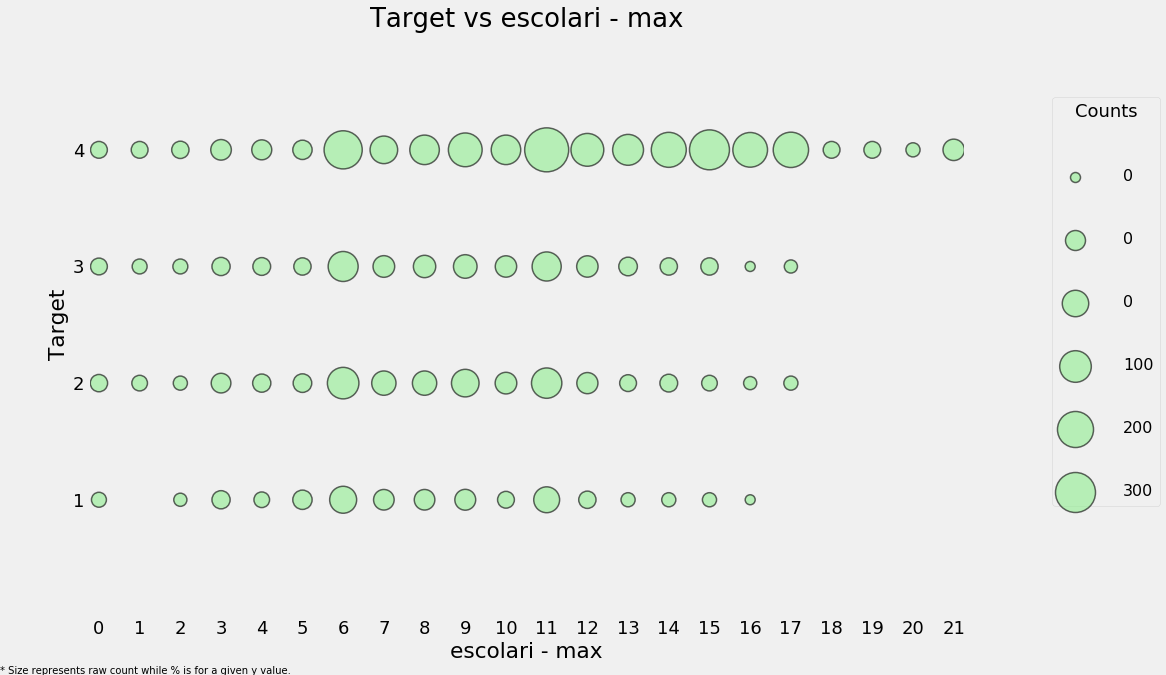

In [116]:
plot_categoricals('escolari - max','Target',final, annotate = False)

In [117]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Target', y = 'escolari-max',data = final)
plt.title('Max Schooling by Target')

ValueError: Could not interpret input 'escolari-max'

<Figure size 720x432 with 0 Axes>

In [118]:
head_gender = ind.loc[ind['parentesco1'] == 1,['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female' : 'female-head'})

In [119]:
final.groupby('female-head')['Target'].value_counts(normalize = True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

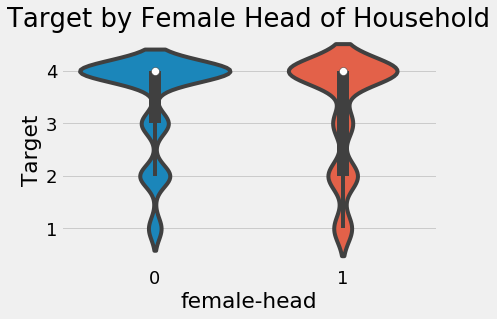

In [120]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

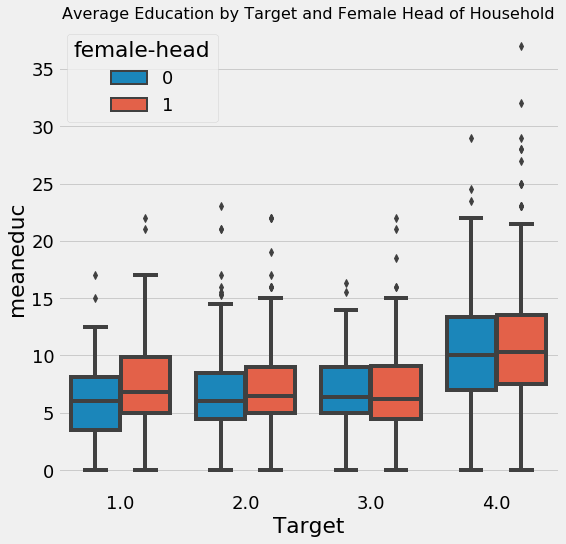

In [121]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

In [122]:
final.groupby('female-head')['meaneduc'].agg(['mean','count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better = True, average = 'macro')  # f1_score를 평가 스코어로 사용할 것이고, 이는 높을수록 좋은 모델임을 뜻한다.

In [124]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

In [125]:
train_set = final[final['Target'].notnull()].drop(columns = ['Id','idhogar','Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id','idhogar','Target'])

In [126]:
submission_base = test[['Id','idhogar']].copy()

In [127]:
submission_base

,Id,idhogar
0,ID_2f6873615,72958b30c
1,ID_1c78846d2,72958b30c
2,ID_e5442cf6a,72958b30c
3,ID_a8db26a79,5b598fbc9
4,ID_a62966799,1e2fc704e
...,...,...
23851,ID_a065a7cad,3aa78c56b
23852,ID_1a7c6953b,d237404b6
23853,ID_07dbb4be2,d237404b6
23854,ID_34d2ed046,d237404b6


In [128]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', imputer),('scaler',MinMaxScaler())])

In [129]:
train_set = pipeline.fit_transform(train_set)

In [130]:
test_set = pipeline.transform(test_set)

In [131]:
model = RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1)

cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0419


In [132]:
model.fit(train_set,train_labels)

feature_importances = pd.DataFrame({'feature' : features, 'importance' : model.feature_importances_})

feature_importances.head()

,feature,importance
0,hacdor,0.000620
1,hacapo,0.000351
2,v14a,0.000331
3,refrig,0.001748
4,paredblolad,0.006879


In [133]:
def plot_feature_importances(df, n = 10, threshold = None):
    plt.style.use('fivethirtyeight')
    
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    df.loc[:n,:].plot.barh(y = 'importance_normalized', x = 'feature', color = 'darkgreen', edgecolor = 'k', figsize = (12,8), legend = False, linewidth = 2)
    plt.xlabel('Normalized Importance',size = 18)
    plt.ylabel('')
    plt.title(f'{n} Most Important Features',size = 18)
    plt.gca().invert_yaxis()
    
    if threshold:
        plt.figure(figsize = (8,6))
        plt.plot(list(range(len(df))), df['cumulative_importance'],'b-')
        plt.xlabel('Number of Features',size = 16)
        plt.ylabel('Cumulative Importance',size = 16)
        plt.title('Cumulative Feature Importance',size = 18)
        
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show()
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

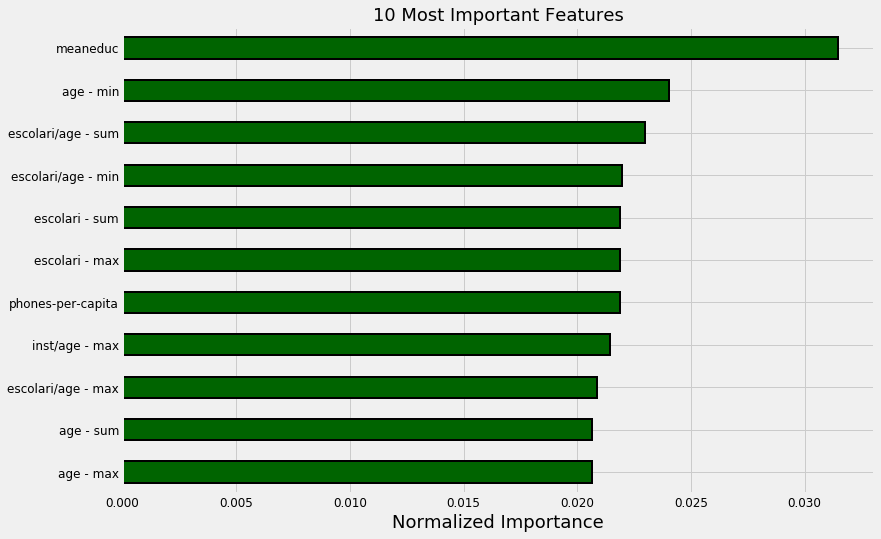

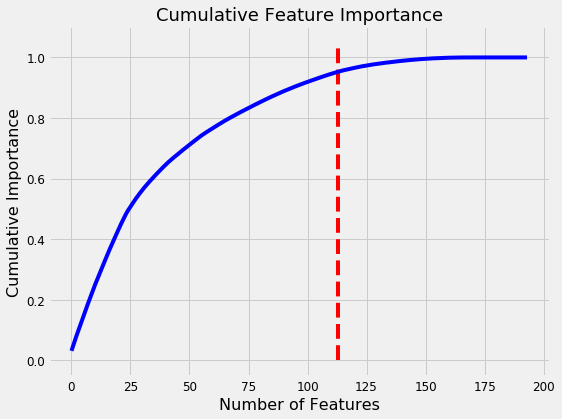

113 features required for 95% of cumulative importance.


In [134]:
norm_fi = plot_feature_importances(feature_importances, threshold = 0.95)

In [135]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

In [136]:
def kde_target(df,variable):
    colors = {1:'red',2:'orange',3 : 'blue', 4 :'green'}
    
    plt.figure(figsize = (12,8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), label = f'Poverty Level: {level}', color = colors[int(subset['Target'].unique())])
        
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('{} Distribution'.format(variable.capitalize()))

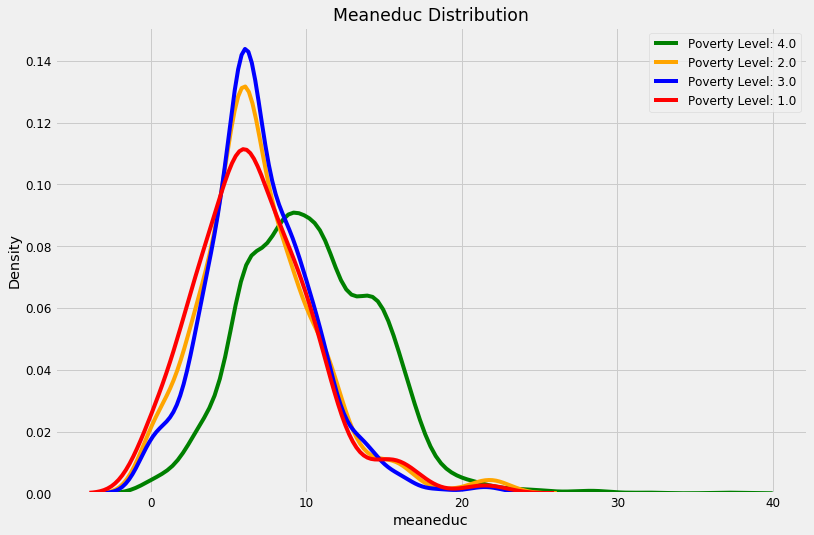

In [137]:
kde_target(final,'meaneduc')

In [138]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [139]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

model_results = pd.DataFrame(columns = ['model','cv_mean','cv_std'])

def cv_model(train, train_labels, model, name, model_results = None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring = scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model' : name, 'cv_mean' : cv_scores.mean(), 'cv_std': cv_scores.std()}, index = [0]), ignore_index = True)
        
    return model_results

In [140]:
model_results = cv_model(train_set, train_labels, LinearSVC(),'LSVC',model_results)

10 Fold CV Score: 0.27737 with std: 0.04235


In [141]:
model_results = cv_model(train_set, train_labels, GaussianNB(),'GNB',model_results)

10 Fold CV Score: 0.18776 with std: 0.04196


In [142]:
model_results = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes = (32,64,128,64,32)), 'MLP',model_results)

10 Fold CV Score: 0.31181 with std: 0.04121


In [143]:
model_results = cv_model(train_set,train_labels,LinearDiscriminantAnalysis(),'LDA',model_results)

10 Fold CV Score: 0.31033 with std: 0.05938


In [144]:
model_results = cv_model(train_set,train_labels,RidgeClassifierCV(),'RIDGE',model_results)

10 Fold CV Score: 0.27734 with std: 0.03208


In [145]:
for n in [5,10,20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set,train_labels,KNeighborsClassifier(n_neighbors = n),f'knn-{n}',model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.3119 with std: 0.02915

KNN with 10 neighbors

10 Fold CV Score: 0.30576 with std: 0.0315

KNN with 20 neighbors

10 Fold CV Score: 0.26873 with std: 0.03723


In [146]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, ExtraTreesClassifier(n_estimators = 100, random_state = 10), 'EXT', model_results)

10 Fold CV Score: 0.31733 with std: 0.05063


In [147]:
model_results = cv_model(train_set, train_labels, RandomForestClassifier(100,random_state = 10),'RF',model_results)

10 Fold CV Score: 0.34387 with std: 0.04195


In [148]:
model_results

,model,cv_mean,cv_std
0,LSVC,0.277368,0.042351
1,GNB,0.187764,0.041965
2,MLP,0.311809,0.041213
3,LDA,0.310328,0.059377
4,RIDGE,0.277335,0.032077
5,knn-5,0.311898,0.029155
6,knn-10,0.305764,0.031500
7,knn-20,0.268725,0.037228
8,EXT,0.317327,0.050629
9,RF,0.343873,0.041947


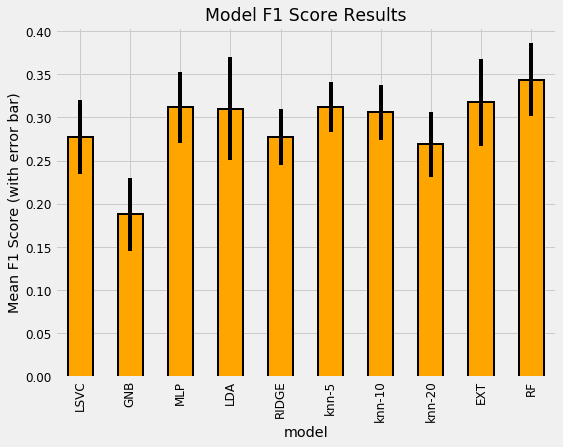

In [149]:
model_results.set_index('model',inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange',figsize = (8,6),yerr = list(model_results['cv_std']),edgecolor = 'k', linewidth = 2)

plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [150]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [151]:
def submit(model,train,train_labels,test,test_ids):
    
    model.fit(train,train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar' : test_ids, 'Target' : predictions})
    
    submission = submission_base.merge(predictions, on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
    
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    return submission

In [152]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1), train_set, train_labels, test_set, test_ids)

rf_submission.to_csv('rf_submission.csv',index = False)

In [153]:
train_set = pd.DataFrame(train_set, columns = features)

corr_matrix = train_set.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['tamhog', 'hhsize', 'hogar_total', 'v18q - count', 'female - sum']

In [154]:
train_set = train_set.drop(columns = to_drop)

train_set.shape

(2973, 189)

In [155]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

In [156]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state = 10, n_estimators = 100, n_jobs = -1)

selector = RFECV(estimator, step = 1, cv = 3, scoring = scorer, n_jobs = -1)

In [157]:
selector

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

In [158]:
selector.fit(train_set,train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

Text(0.5, 1.0, 'Feature Selection Scores')

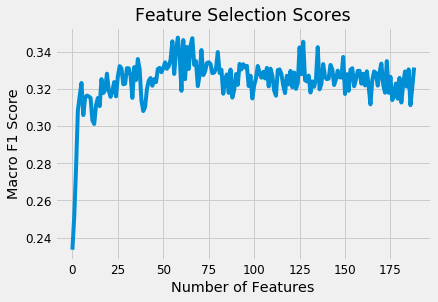

In [159]:
plt.plot(selector.grid_scores_)

plt.xlabel('Number of Features')
plt.ylabel('Macro F1 Score')
plt.title('Feature Selection Scores')

In [160]:
selector.n_features_

59

In [161]:
rankings = pd.DataFrame({'feature' : list(train_set.columns), 'rank' : list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
94,rents-per-capita,1
125,estadocivil7 - std,1
124,estadocivil7 - sum,1
76,tamviv,1
104,female - std,1
101,dis - sum,1
93,rooms-per-capita,1
91,phones-per-capita,1
90,bonus,1
89,warning,1


In [162]:
rankings[rankings['rank'] == 1]

,feature,rank
94,rents-per-capita,1
125,estadocivil7 - std,1
124,estadocivil7 - sum,1
76,tamviv,1
104,female - std,1
101,dis - sum,1
93,rooms-per-capita,1
91,phones-per-capita,1
90,bonus,1
89,warning,1


In [163]:
train_selected = selector.transform(train_set)

In [164]:
train_selected

array([[1.        , 1.        , 1.        , ..., 0.2978427 , 0.        ,
        0.04545455],
       [0.        , 0.        , 1.        , ..., 0.2978427 , 0.        ,
        0.09090909],
       [0.        , 1.        , 1.        , ..., 0.2978427 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.44725388, 0.57777778,
        0.22727273],
       [1.        , 1.        , 1.        , ..., 0.10453789, 0.0852459 ,
        0.09090909],
       [1.        , 0.        , 1.        , ..., 0.3152931 , 0.4       ,
        0.22727273]])

In [165]:
test_selected = selector.transform(test_set)

In [166]:
test_selected

array([[1.        , 1.        , 1.        , ..., 0.47938179, 0.50731707,
        0.13636364],
       [1.        , 1.        , 1.        , ..., 0.2978427 , 0.        ,
        0.09090909],
       [1.        , 1.        , 1.        , ..., 0.2978427 , 0.        ,
        0.09090909],
       ...,
       [0.        , 0.        , 0.        , ..., 0.76077371, 0.86666667,
        0.13636364],
       [0.        , 0.        , 0.        , ..., 0.20830499, 0.28888889,
        0.27272727],
       [0.        , 0.        , 0.        , ..., 0.11775664, 0.12037037,
        0.18181818]])

In [167]:
selected_features = train_set.columns[np.where(selector.ranking_ == 1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [168]:
train_selected

,paredblolad,pisomoscer,cielorazo,energcocinar2,lugar1,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h2,r4h3,r4m2,r4m3,r4t1,r4t2,tamviv,hogar_nin,bedrooms,qmobilephone,walls,roof,floor,walls+roof+floor,warning,bonus,phones-per-capita,rooms-per-capita,rents-per-capita,dis - sum,female - std,estadocivil7 - sum,estadocivil7 - std,parentesco2 - std,parentesco3 - sum,escolari - min,escolari - max,escolari - sum,escolari - std,escolari - range,age - min,age - max,age - sum,age - std,age - range,inst - max,inst - std,inst - range,escolari/age - min,escolari/age - max,escolari/age - sum,escolari/age - std,escolari/age - range,inst/age - max,inst/age - std,inst/age - range,tech - sum
0,1.0,1.0,1.0,0.0,1.0,0.080732,0.000000,0.476190,0.000000,0.270270,0.137931,0.2,0.125,0.125,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.1,0.5,0.0,0.0,0.166667,0.00,0.25,0.333333,0.320755,0.190000,0.000000,0.745731,0.0,0.509335,0.525621,0.0,0.476190,0.476190,0.086207,0.238111,0.000000,0.457447,0.316456,0.070423,0.376549,0.000000,0.375,0.281299,0.000,0.332226,0.314637,0.042686,0.348945,0.000000,0.179402,0.297843,0.000000,0.045455
1,0.0,0.0,1.0,1.0,1.0,0.057362,1.000000,0.571429,0.000000,0.324324,0.137931,0.3,0.125,0.125,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.1,0.5,0.5,0.5,0.500000,0.00,0.50,0.333333,0.433962,0.135000,0.000000,0.745731,0.0,0.509335,0.525621,0.0,0.571429,0.571429,0.103448,0.238111,0.000000,0.712766,0.620253,0.138028,0.376549,0.000000,0.875,0.281299,0.000,0.255864,0.242318,0.032875,0.348945,0.000000,0.268657,0.297843,0.000000,0.090909
2,0.0,1.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.523810,0.297297,0.051724,0.7,0.000,0.000,0.166667,0.125,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.5,1.0,1.0,0.833333,0.00,0.25,0.000000,0.886792,0.000000,0.333333,0.745731,0.0,0.509335,0.525621,0.0,0.523810,0.523810,0.094828,0.238111,0.000000,0.978723,0.936709,0.208451,0.376549,0.000000,0.500,0.281299,0.000,0.170807,0.161765,0.021946,0.348945,0.000000,0.111801,0.297843,0.000000,0.000000
3,1.0,1.0,1.0,1.0,1.0,0.076483,0.125000,0.523810,0.000000,0.297297,0.195402,0.4,0.250,0.250,0.166667,0.250,0.142857,0.2,0.214286,0.222222,0.285714,0.3,1.0,1.0,1.0,1.000000,0.00,0.50,0.250000,0.122642,0.045000,0.000000,0.816497,0.1,0.707107,0.707107,0.2,0.095238,0.523810,0.284483,0.287692,0.428571,0.085106,0.253165,0.230986,0.347886,0.322581,0.500,0.250000,0.375,0.357143,0.716263,0.250763,0.286095,0.399160,0.453782,0.148846,0.185139,0.363636
4,1.0,1.0,1.0,0.0,1.0,0.055237,0.125000,0.428571,0.000000,0.270270,0.655172,0.1,0.125,0.125,0.166667,0.375,0.285714,0.1,0.214286,0.222222,0.000000,0.1,0.0,0.0,0.5,0.166667,0.00,0.25,0.083333,0.037736,0.032500,0.000000,0.707107,0.1,0.707107,0.707107,0.2,0.000000,0.523810,0.198276,0.345033,0.523810,0.074468,0.151899,0.163380,0.272956,0.247312,0.500,0.322749,0.500,0.000000,0.531513,0.177233,0.380759,0.561224,0.367347,0.270829,0.371429,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,0.000000,0.238095,0.121622,0.396552,0.3,0.125,0.250,0.166667,0.375,0.428571,0.1,0.285714,0.333333,0.142857,0.2,0.5,0.5,0.5,0.500000,0.25,0.25,0.133333,0.071698,0.000000,0.000000,0.774597,0.0,0.000000,0.632456,0.3,0.000000,0.238095,0.077586,0.167684,0.238095,0.063830,0.139241,0.160563,0.268255,0.247312,0.125,0.096825,0.125,0.000000,0.260181,0.060615,0.208380,0.274725,0.098901,0.090299,0.100000,0.227273
2969,0.0,0.0,0.0,0.0,0.0,0.000000,0.187500,0.095238,0.000000,0.108108,0.396552,0.2,0.250,0.500,0.166667,0.125,0.285714,0.2,0.285714,0.333333,0.142857,0.2,0.5,0.0,0.5,0.333333,0.50,0.00,0.133333,0.049057,0.000000,0.666667,0.632456,0.2,0.774597,0.632456,0.2,0.000000,0.285714,0.146552,0.175610,0.285714,0.021277,0.278481,0.225352,0.376702,0.408602,0.250,0.147902,0.250,0.000000,0.624434,0.18

In [169]:
model_results = cv_model(train_selected, train_labels,model, 'RF-SEL',model_results)

10 Fold CV Score: 0.35398 with std: 0.03668


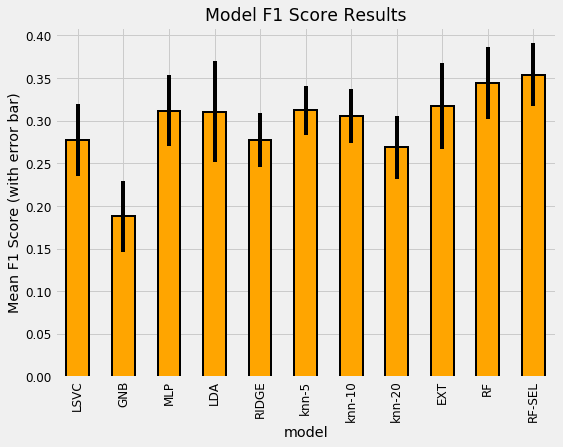

In [170]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8,6), yerr = list(model_results['cv_std']),edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [171]:
def macro_f1_score(labels, predictions):
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis = 0)
    
    metric_value = f1_score(labels,predictions, average = 'macro')
    
    return 'macro_f1', metric_value, True

In [176]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [177]:
%%capture --no-display

predictions, gbm_fi = model_gbm(train_set,train_labels,test_set,test_ids,return_preds = True)

'Fold 1, Validation Score: 0.39574, Estimators Trained: 0'

'Fold 2, Validation Score: 0.40043, Estimators Trained: 0'

'Fold 3, Validation Score: 0.41239, Estimators Trained: 0'

'Fold 4, Validation Score: 0.41277, Estimators Trained: 0'

'Fold 5, Validation Score: 0.40647, Estimators Trained: 0'

'5 cross validation score: 0.40556 with std: 0.00666.'

In [ ]:
predictions.head()

In [174]:
plt.rcParams['font.size'] = 18

g = sns.FacetGrid(predictions, row = 'fold', hue = 'Target', size = 3, aspect = 4 ) # 다중플롯, row와 hue를 통한 구분
g.map(sns.kdeplot, 'confidence')
g.add_legend();

plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05)

NameError: name 'predictions' is not defined

In [ ]:
plt.figure(figsize = (24,12))
sns.violinplot(x = 'Target', y = 'confidence', hue = 'fold', data = predictions);

In [ ]:
predictions = predictions.groupby('idhogar', as_index = False).mean()

predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1,2,3,4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])

plt.figure(figsize = (10,6))
sns.boxplot(x = 'Target', y = 'confidence', data = predictions)
plt.title('Confidence by Target')

plt.figure(figsize = (10,6))
sns.violinplot(x = 'Target', y = 'confidence', data = predictions)
plt.title('Confidence by Target')

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, return_preds = False)

submission.to_csv('gbm_baseline.csv')

In [ ]:
_ = plot_feature_importances(gbm_fi,threshold = 0.95)

In [ ]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model' : ['GBM', 'GBM_SEL'],'cv_mean' : [valid_scores.mean(),valid_scores_selected.mean()], 'cv_std' : [valid_scores.std(), valid_scores_selected.std()]}),sort = True)

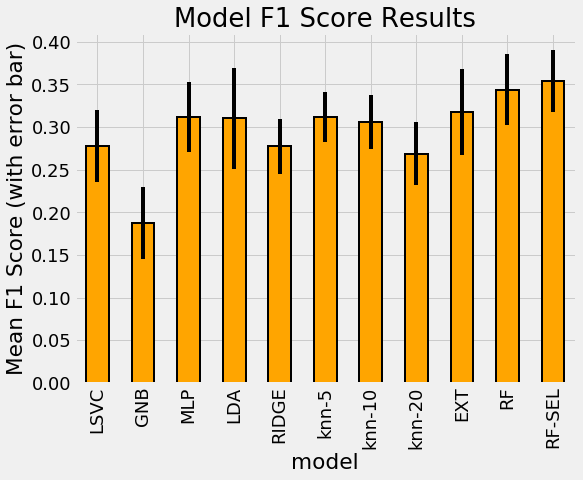

In [178]:
model_results.set_index('model',inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange',figsize = (8,6),yerr = list(model_results['cv_std']),edgecolor = 'k', linewidth = 2)

plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace = True)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, nfolds = 10, return_preds = False)

In [ ]:
submission.to_csv('gbm_10fold.csv',index = False)

In [ ]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model.gbm(train_selected, train_labels, test_selected, test_ids, nfolds = 10)

In [ ]:
submission.to_csv('gbm_10fold_selected.csv',index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                    sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6), 
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")

In [ ]:
from hyperopt import hp, tpe, Trails, fmin, STATUS_OK